# **Machine Learning Project - Code Memory**

*Francisco Olivenza Millón*

Title

"Gestión Integral de los Residuos Documentales en 'Gestión Integral de Residuos Industriales'"

Description

"La empresa nos ha pasado los csv extraídos de su SGD (Sistema de Gestión Documental) que ha ido construyendo desde el 1980 Su estructura no ha cambiado desde su fundación. Las normas archivísticas se han tenido en cuenta y han desarrollado unos parámetros de Política de Protección de Datos, Valor del documentos por el número de consultas que tien el expediente, Estado de conservación del documento (su legibilidad). 
Esta empresa quiere desarrollar un modelo que prediga si un documento tiene que ser expurgado o tiene que tener otro proceso de conservación, para ahorrar dinero y espacio en la nube."

## **Generación de datos sintéticos**

Para respetar el 'orden lógico' que tendría la documentación en cualquier institución, vamos a plantear la creación de datos sintéticos desde un SGD basado en la ISAD-G, es decir, por descripción multinivel. Generando los siguientes niveles, de mayor a menor:

* Fondo
* Secciones
* Series
* Subseries
* Expedientes
* Unidades documentales

Los campos de descripción serán omitidos al máximo y se añadirán otros como 'porcentaje de datos personales', 'ilegibilidad' o 'importancia' para decidir el tratamiento.

In [1]:
!pip install faker # Para generar el código hay que usar faker, por lo que hay que descargarlo.

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Fondo

In [2]:
import csv
import random
import string 
from datetime import datetime, timedelta
from faker import Faker
import pandas as pd
import numpy as np

In [3]:
import csv
import pandas as pd
import numpy as np

fondo_data = [
    {
        'id_fondo': 1,
        'codigo_fondo': 'F-IND',
        'nombre_fondo': 'Gestión Integral de Residuos Industriales',
        'fecha_creacion': '1980-01-01',
        'descripcion': 'Documentación generada por la empresa en sus operaciones de tratamiento y gestión de residuos industriales peligrosos y no peligrosos',
        'alcance_temporal': '1980-actualidad',
        'notas_administrativas': 'Fondo activo con transferencias periódicas desde departamentos productores'
    }
]

with open('fondo.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fondo_data[0].keys())
    writer.writeheader()
    writer.writerows(fondo_data)

### Sección

In [4]:
secciones = [
    {
        'id_seccion': 1,
        'id_fondo': 1,
        'codigo_seccion': '1',
        'nombre_seccion': 'OPERACIONES INDUSTRIALES',
        'descripcion': 'Documentación relacionada con los procesos industriales de tratamiento de residuos',
        'fecha_creacion': '1980-01-01',
        'responsable': 'Director de Operaciones',
        'acceso': 'Restringido (requiere autorización)'
    },
    {
        'id_seccion': 2,
        'id_fondo': 1,
        'codigo_seccion': '2',
        'nombre_seccion': 'LOGÍSTICA Y TRANSPORTE',
        'descripcion': 'Documentación sobre recolección, transporte y gestión logística de residuos',
        'fecha_creacion': '1980-01-01',
        'responsable': 'Jefe de Logística',
        'acceso': 'Restringido (requiere autorización)'
    },
    {
        'id_seccion': 3,
        'id_fondo': 1,
        'codigo_seccion': '3',
        'nombre_seccion': 'DEPARTAMENTO LEGAL',
        'descripcion': 'Documentación jurídica, regulatoria y de cumplimiento normativo',
        'fecha_creacion': '1980-01-01',
        'responsable': 'Director Legal',
        'acceso': 'Alto restringido (solo personal autorizado)'
    },
    {
        'id_seccion': 4,
        'id_fondo': 1,
        'codigo_seccion': '4',
        'nombre_seccion': 'ADMINISTRACIÓN Y SERVICIOS',
        'descripcion': 'Documentación transversal de apoyo a la organización',
        'fecha_creacion': '1980-01-01',
        'responsable': 'Director Administrativo',
        'acceso': 'Variable según subserie'
    }
]

with open('seccion.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=secciones[0].keys())
    writer.writeheader()
    writer.writerows(secciones)

### Serie

In [5]:
series = [
    # Sección 1: OPERACIONES INDUSTRIALES
    {'id_serie': 1, 'id_seccion': 1, 'codigo_serie': '1.1', 'nombre_serie': 'Tratamiento Térmico', 'descripcion': 'Documentación de procesos de incineración y pirólisis', 'retencion': '10 años'},
    {'id_serie': 2, 'id_seccion': 1, 'codigo_serie': '1.2', 'nombre_serie': 'Tratamiento Físico-Químico', 'descripcion': 'Documentación de procesos de neutralización y estabilización', 'retencion': '10 años'},
    {'id_serie': 3, 'id_seccion': 1, 'codigo_serie': '1.3', 'nombre_serie': 'Almacenamiento Temporal', 'descripcion': 'Registros de almacenamiento de residuos peligrosos', 'retencion': '5 años'},
    {'id_serie': 4, 'id_seccion': 1, 'codigo_serie': '1.4', 'nombre_serie': 'I+D+i', 'descripcion': 'Documentación de proyectos de investigación e innovación', 'retencion': 'Permanente'},
    
    # Sección 2: LOGÍSTICA Y TRANSPORTE
    {'id_serie': 5, 'id_seccion': 2, 'codigo_serie': '2.1', 'nombre_serie': 'Rutas de Recolección', 'descripcion': 'Planificación y seguimiento de rutas de recogida', 'retencion': '3 años'},
    {'id_serie': 6, 'id_seccion': 2, 'codigo_serie': '2.2', 'nombre_serie': 'Emergencias', 'descripcion': 'Protocolos y registros de incidentes durante el transporte', 'retencion': '10 años'},
    {'id_serie': 7, 'id_seccion': 2, 'codigo_serie': '2.3', 'nombre_serie': 'Flota y Mantenimiento', 'descripcion': 'Registros de vehículos y mantenimiento de la flota', 'retencion': 'Vida útil + 2 años'},
    
    # Sección 3: DEPARTAMENTO LEGAL
    {'id_serie': 8, 'id_seccion': 3, 'codigo_serie': '3.1', 'nombre_serie': 'Cumplimiento Normativo', 'descripcion': 'Documentación de cumplimiento con normativas ambientales', 'retencion': 'Permanente'},
    {'id_serie': 9, 'id_seccion': 3, 'codigo_serie': '3.2', 'nombre_serie': 'Litigios', 'descripcion': 'Expedientes legales y documentación de procesos judiciales', 'retencion': 'Finalización + 10 años'},
    {'id_serie': 10, 'id_seccion': 3, 'codigo_serie': '3.3', 'nombre_serie': 'Propiedad Intelectual', 'descripcion': 'Patentes y registros de propiedad intelectual', 'retencion': 'Permanente'},
    
    # Sección 4: ADMINISTRACIÓN Y SERVICIOS
    {'id_serie': 11, 'id_seccion': 4, 'codigo_serie': '4.1', 'nombre_serie': 'Recursos Humanos', 'descripcion': 'Documentación de personal y nóminas', 'retencion': 'Variable según legislación laboral'},
    {'id_serie': 12, 'id_seccion': 4, 'codigo_serie': '4.2', 'nombre_serie': 'Contabilidad y Finanzas', 'descripcion': 'Documentación financiera y fiscal', 'retencion': '10 años'},
    {'id_serie': 13, 'id_seccion': 4, 'codigo_serie': '4.3', 'nombre_serie': 'Infraestructura', 'descripcion': 'Documentación de instalaciones y mantenimiento', 'retencion': 'Vida útil + 5 años'},
    {'id_serie': 14, 'id_seccion': 4, 'codigo_serie': '4.4', 'nombre_serie': 'Archivo y Gestión Documental', 'descripcion': 'Documentación sobre la gestión del propio archivo', 'retencion': 'Permanente'},
    {'id_serie': 15, 'id_seccion': 4, 'codigo_serie': '4.5', 'nombre_serie': 'Junta Directiva', 'descripcion': 'Actas y acuerdos de la máxima dirección', 'retencion': 'Permanente'}
]

with open('serie.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=series[0].keys())
    writer.writeheader()
    writer.writerows(series)

### Subserie

In [6]:
subseries = [
    {'id_subserie': 1, 'id_serie': 1, 'codigo_subserie': '1.1.1', 'nombre_subserie': 'Incineración (Residuos Peligrosos)', 'descripcion': 'Registros de operación de hornos de incineración', 'retencion': 10, 'disposicion_final': 'Conservación '},
    {'id_subserie': 2, 'id_serie': 1, 'codigo_subserie': '1.1.2', 'nombre_subserie': 'Pirólisis', 'descripcion': 'Documentación técnica y registros de procesos de pirólisis', 'retencion': 10, 'disposicion_final': 'Conservación '},
    {'id_subserie': 3, 'id_serie': 1, 'codigo_subserie': '1.1.3', 'nombre_subserie': 'Registros de Emisiones', 'descripcion': 'Registros de emisiones según normativa EPA/EU Directive 2000/76/EC', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 4, 'id_serie': 2, 'codigo_subserie': '1.2.1', 'nombre_subserie': 'Neutralización de Ácidos', 'descripcion': 'Registros de procesos de neutralización de residuos ácidos', 'retencion': 10, 'disposicion_final': 'Conservación '},
    {'id_subserie': 5, 'id_serie': 2, 'codigo_subserie': '1.2.2', 'nombre_subserie': 'Estabilización de Metales Pesados', 'descripcion': 'Documentación de procesos de estabilización de metales', 'retencion': 10, 'disposicion_final': 'Conservación '},
    {'id_subserie': 6, 'id_serie': 2, 'codigo_subserie': '1.2.3', 'nombre_subserie': 'Lodos Peligrosos', 'descripcion': 'Registros de tratamiento y caracterización de lodos', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 7, 'id_serie': 3, 'codigo_subserie': '1.3.1', 'nombre_subserie': 'Búnkeres (Residuos de Alta Toxicidad)', 'descripcion': 'Registros de almacenamiento en áreas confinadas', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 8, 'id_serie': 3, 'codigo_subserie': '1.3.2', 'nombre_subserie': 'Tanques de Líquidos Inflamables', 'descripcion': 'Registros de almacenamiento en tanques especiales', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 9, 'id_serie': 3, 'codigo_subserie': '1.3.3', 'nombre_subserie': 'Seguimiento de Caducidades', 'descripcion': 'Control de tiempos máximos de almacenamiento', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 10, 'id_serie': 4, 'codigo_subserie': '1.4.1', 'nombre_subserie': 'Proyectos de Economía Circular', 'descripcion': 'Documentación de proyectos de reutilización y reciclaje', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 11, 'id_serie': 4, 'codigo_subserie': '1.4.2', 'nombre_subserie': 'Alternativas a la Incineración', 'descripcion': 'Estudios y pruebas de nuevos métodos de tratamiento', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 12, 'id_serie': 5, 'codigo_subserie': '2.1.1', 'nombre_subserie': 'Planificación Georreferenciada', 'descripcion': 'Rutas optimizadas y planificación logística', 'retencion': 3, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 13, 'id_serie': 5, 'codigo_subserie': '2.1.2', 'nombre_subserie': 'Permisos ADR', 'descripcion': 'Documentación de permisos para transporte internacional', 'retencion': 2, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 14, 'id_serie': 6, 'codigo_subserie': '2.2.1', 'nombre_subserie': 'Protocolos de Derrames', 'descripcion': 'Procedimientos para manejo de emergencias químicas', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 15, 'id_serie': 6, 'codigo_subserie': '2.2.2', 'nombre_subserie': 'Kits de Contención Química', 'descripcion': 'Registros de mantenimiento y uso de equipos de emergencia', 'retencion': 10, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 16, 'id_serie': 7, 'codigo_subserie': '2.3.1', 'nombre_subserie': 'Vehículos Especializados', 'descripcion': 'Documentación técnica y registros de vehículos', 'retencion': 2, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 17, 'id_serie': 7, 'codigo_subserie': '2.3.2', 'nombre_subserie': 'Certificaciones de Limpieza', 'descripcion': 'Certificados de descontaminación de vehículos', 'retencion': 2, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 18, 'id_serie': 8, 'codigo_subserie': '3.1.1', 'nombre_subserie': 'Ley 22/2011 (España)', 'descripcion': 'Documentación de cumplimiento con legislación española', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 19, 'id_serie': 8, 'codigo_subserie': '3.1.2', 'nombre_subserie': 'Reglamento REACH (UE)', 'descripcion': 'Registros y documentación REACH', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 20, 'id_serie': 9, 'codigo_subserie': '3.2.1', 'nombre_subserie': 'Demandas Ambientales', 'descripcion': 'Expedientes judiciales por temas ambientales', 'retencion': 10, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 21, 'id_serie': 9, 'codigo_subserie': '3.2.2', 'nombre_subserie': 'Sanciones Administrativas', 'descripcion': 'Expedientes sancionadores y recursos', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 22, 'id_serie': 10, 'codigo_subserie': '3.3.1', 'nombre_subserie': 'Patentes de Procesos', 'descripcion': 'Documentación de patentes y propiedad industrial', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 23, 'id_serie': 11, 'codigo_subserie': '4.1.1', 'nombre_subserie': 'Contratación y Nóminas', 'descripcion': 'Expedientes de personal y nóminas', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 24, 'id_serie': 11, 'codigo_subserie': '4.1.2', 'nombre_subserie': 'Formación HAZMAT/OSHA', 'descripcion': 'Registros de formación del personal', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 25, 'id_serie': 12, 'codigo_subserie': '4.2.1', 'nombre_subserie': 'Auditorías Internas', 'descripcion': 'Informes y documentación de auditorías financieras', 'retencion': 10, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 26, 'id_serie': 12, 'codigo_subserie': '4.2.2', 'nombre_subserie': 'Impuestos Ambientales', 'descripcion': 'Documentación fiscal relacionada con tasas ambientales', 'retencion': 10, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 27, 'id_serie': 13, 'codigo_subserie': '4.3.1', 'nombre_subserie': 'Mantenimiento de Plantas', 'descripcion': 'Registros de mantenimiento de instalaciones', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 28, 'id_serie': 13, 'codigo_subserie': '4.3.2', 'nombre_subserie': 'Seguridad Perimetral', 'descripcion': 'Documentación de sistemas de seguridad', 'retencion': 5, 'disposicion_final': 'Expurgo total'},
    {'id_subserie': 29, 'id_serie': 14, 'codigo_subserie': '4.4.1', 'nombre_subserie': 'Expedientes Digitales', 'descripcion': 'Documentación sobre gestión de archivos digitales', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 30, 'id_serie': 14, 'codigo_subserie': '4.4.2', 'nombre_subserie': 'Conservación a Largo Plazo', 'descripcion': 'Políticas y procedimientos de conservación documental', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 31, 'id_serie': 15, 'codigo_subserie': '4.5.1', 'nombre_subserie': 'Actas de Decisiones Estratégicas', 'descripcion': 'Actas de reuniones de la junta directiva', 'retencion': 10, 'disposicion_final': 'Conservación'},
    {'id_subserie': 32, 'id_serie': 15, 'codigo_subserie': '4.5.2', 'nombre_subserie': 'Informes Anuales de Sostenibilidad', 'descripcion': 'Informes corporativos de sostenibilidad y RSC', 'retencion': 10, 'disposicion_final': 'Conservación'}
]
# Subseries con importancia siempre alta
subseries_importancia_alta = {
    'Actas de Decisiones Estratégicas',
    'Patentes de Procesos',
    'Informes Anuales de Sostenibilidad',
    'Demandas Ambientales'
}

# Subserie con datos personales
subserie_datos_personales = {'Contratación y Nóminas','Auditorías Internas','Seguridad Perimetral','Certificaciones de Limpieza','Sanciones Administrativas'}

# Añadir campos adicionales
for s in subseries:
    nombre = s['nombre_subserie']
    
    # Importancia
    if nombre in subseries_importancia_alta:
        s['importancia'] = 'Alta'
        s['tratamiento_maximo'] = 'Restaurar y digitalizar'
    else:
        s['importancia'] = 'Media' 
        s['tratamiento_maximo'] = 'Digitalizar o conservar parcialmente'
    
    # Datos personales
    if nombre in subserie_datos_personales:
        s['datos_personales_prob'] = 0.6
    else:
        s['datos_personales_prob'] = 0.2

# Guardar con nuevos campos
fieldnames = list(subseries[0].keys()) + ['importancia', 'tratamiento_maximo', 'datos_personales_prob']

with open('subserie.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=subseries[0].keys())
    writer.writeheader()
    writer.writerows(subseries)

### Expedientes

In [ ]:
import csv
import random
from datetime import datetime, timedelta
from faker import Faker
import pandas as pd
import numpy as np

fake = Faker('es_ES')
random.seed(42)

NUM_EXPEDIENTES = 8000 
# Se puede modificar según las necesidades del usuario

ARCHIVO_EXPEDIENTE_P2 = 'exp.csv'
# El nombre que se le pondrá al archivo generado.

# Crear un diccionario de mapeo id_subserie -> retención
# Cargar el CSV en un DataFrame
df_subseries = pd.read_csv('subserie.csv')
mapa_retencion = dict(zip(df_subseries['id_subserie'], df_subseries['retencion']))
mapa_importancia = dict(zip(df_subseries['id_subserie'], df_subseries['importancia']))
mapa_tratamiento = dict(zip(df_subseries['id_subserie'], df_subseries['tratamiento_maximo']))
mapa_datos_personales = dict(zip(df_subseries['id_subserie'], df_subseries['datos_personales_prob']))

# Definir porcentajes por subserie (deben sumar 100
porcentajes_subserie = {
    # DIR (2 subseries)
    1: 2,   # DIR 
    2: 2,   # DIR 
    # CLI (2 subseries)
    3: 8,   # CLI 
    4: 8,   # CLI 
    # EST (1 subserie)
    5: 6,   # EST 
    # UE (2 subseries)
    6: 2,   # UE 
    7: 2,   # UE 
    # OP (1 subserie)
    8: 5,   # OP 
    # AUD (1 subserie)
    9: 4,   # AUD 
    # NOM (2 subseries)
    10: 2,  # NOM 
    11: 2,  # NOM 
    # MEM (1 subserie)
    12: 5,  # MEM 
    # LOG (5 subseries)
    13: 3,  # LOG 
    14: 3,  # LOG 
    15: 3,  # LOG 
    16: 3,  # LOG 
    17: 3,  # LOG
    # LEG (5 subseries) → 1% c/u
    18: 3,  # LEG 
    19: 1,  # LEG
    20: 1,  # LEG
    21: 1,  # LEG
    22: 1,  # LEG
    # ADM (10 subseries) → 2% c/u
    23: 12,  # ADM
    24: 2,  # ADM
    25: 2,  # ADM
    26: 2,  # ADM
    27: 2,  # ADM
    28: 2,  # ADM
    29: 2,  # ADM
    30: 2,  # ADM
    31: 2,  # ADM
    32: 2   # ADM
}

# Verificar que la suma sea 100%
assert sum(porcentajes_subserie.values()) == 100, "Los porcentajes deben sumar 100%"

# Crear lista ponderada para la selección aleatoria
subseries_ponderadas = []
for subserie_id, porcentaje in porcentajes_subserie.items():
    subseries_ponderadas.extend([subserie_id] * porcentaje)

def generar_distribucion_exponencial(inicio=1980, fin=2024, total=NUM_EXPEDIENTES, porcentaje_reciente=0.50, años_recientes=6):
    años = list(range(inicio, fin + 1))
    num_años = len(años)
    
    # Asegurarnos que los años recientes sean los últimos
    año_corte = fin - años_recientes
    
    # Crear pesos exponenciales para los años no recientes
    años_normales = [a for a in años if a <= año_corte]
    crecimiento = np.exp(np.linspace(2, 3, len(años_normales)))  # Exponencial creciente
    crecimiento /= crecimiento.sum()  # Normalizar
    
    # Distribuir el 50% no reciente
    expedientes_normales = int(total * (1 - porcentaje_reciente))
    expedientes_por_año = {año: int(round(p * expedientes_normales)) for año, p in zip(años_normales, crecimiento)}
    
    # Distribuir el 50% reciente uniformemente entre los últimos años
    expedientes_recientes = total - sum(expedientes_por_año.values())
    expedientes_por_año_reciente = expedientes_recientes // años_recientes
    for año in range(fin - años_recientes + 1, fin + 1):
        expedientes_por_año[año] = expedientes_por_año_reciente
    
    # Ajustar redondeo para que sume exactamente el total
    diferencia = total - sum(expedientes_por_año.values())
    if diferencia != 0:
        expedientes_por_año[fin] += diferencia
    
    return expedientes_por_año

# Generar la distribución con el nuevo rango (1980-2025)
expedientes_por_año = generar_distribucion_exponencial(inicio=1980, fin=2025)

def generar_resumen(expediente, titulo, fecha_creacion):
    base = expediente['codigo'].split('-')[0]
    año = fecha_creacion.year
    resumen_por_tipo = {
        'DIR': f"Contiene actas, resoluciones y comunicaciones internas generadas por la Dirección en {año}, relacionadas con la toma de decisiones y administración general.",
        'CLI': f"Documentación contractual y técnica sobre servicios prestados a clientes durante {año}, incluyendo acuerdos y anexos firmados.",
        'EST': f"Incluye informes de evaluación técnica y resultados de estudios ambientales realizados en {año} por el departamento de Ingeniería.",
        'UE': f"Compilación de normativas internas, manuales y protocolos aplicados en distintas áreas operativas durante {año}.",
        'OP': f"Registros de operaciones diarias y partes de turno en las plantas de tratamiento documentados en {año}.",
        'AUD': f"Documentos generados a raíz de auditorías internas o externas, con hallazgos, recomendaciones y planes correctivos de {año}.",
        'NOM': f"Información salarial, nóminas y registros de haberes del personal correspondientes a {año}.",
        'MEM': f"Informe anual de gestión y estados financieros de la empresa correspondientes al ejercicio {año}.",
        'LOG': f"Registros logísticos, guías de despacho y seguimiento de entregas realizados en {año}.",
        'LEG': f"Documentos legales, juicios y contratos revisados o gestionados durante el año {año}.",
        'ADM': f"Actas, informes administrativos y correspondencia tramitada en {año} por diferentes unidades organizativas."
    }
    return resumen_por_tipo.get(base, f"Documentación variada generada en {año} sobre operaciones internas de la empresa.")

# Asociación subserie -> serie
subserie_serie_map = {
    1: 'DIR', 2: 'DIR', 3: 'CLI', 4: 'CLI',
    5: 'EST', 6: 'UE', 7: 'UE', 8: 'OP',
    9: 'AUD', 10: 'NOM', 11: 'NOM', 12: 'MEM',
    13: 'LOG', 14: 'LOG', 15: 'LOG', 16: 'LOG',
    17: 'LOG', 18: 'LEG', 19: 'LEG', 20: 'LEG',
    21: 'LEG', 22: 'LEG', 23: 'ADM', 24: 'ADM',
    25: 'ADM', 26: 'ADM', 27: 'ADM', 28: 'ADM',
    29: 'ADM', 30: 'ADM', 31: 'ADM', 32: 'ADM'
}

# Títulos por tipo
titulos_exp = {
    'DIR': "Gestión directiva año {año}",
    'CLI': "Contratación cliente {nombre}",
    'EST': "Evaluación técnica proyecto {nombre}",
    'UE': "Normativa y procedimientos área {area}",
    'OP': "Registro operativo mensual {mes}/{año}",
    'AUD': "Auditoría interna {año}",
    'NOM': "Proceso de nómina {mes} {año}",
    'MEM': "Memoria institucional {año}",
    'LOG': "Documentación logística {tipo} {año}",
    'LEG': "Asunto legal {tipo} {año}",
    'ADM': "Documentación administrativa {tipo} {año}"
}

productores = [
    "Gerencia", "Finanzas", "Recursos Humanos", "Operaciones",
    "Auditoría", "Calidad", "Ingeniería", "Ambiental", "Logística"
]

MESES = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
         'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

tipos_doc = ["informe", "reporte", "contrato", "oficio", "memorando"]

# Generación de expedientes para usar esta distribución
expedientes = []
años_ordenados = sorted(expedientes_por_año.keys()) 

for i in range(1, NUM_EXPEDIENTES + 1):
    # Seleccionar subserie según los porcentajes definidos
    subserie_id = random.choice(subseries_ponderadas)
    serie_abrev = subserie_serie_map[subserie_id]
    
    # Seleccionar año según la distribución, respetando el orden cronológico
    año = None
    for a in años_ordenados:
        if expedientes_por_año[a] > 0:
            año = a
            expedientes_por_año[a] -= 1
            break
    
    # Si no quedan expedientes en ese año, buscar el siguiente disponible
    if año is None:
        año = min(a for a in años_ordenados if expedientes_por_año[a] > 0)
        expedientes_por_año[año] -= 1
    
    codigo = f"{serie_abrev}-{año}-{i:03d}"
    
    # Generar fecha dentro del año seleccionado
    fecha_inicio_expediente = datetime(año, random.randint(1, 12), random.randint(1, 28))
    duracion_expediente = random.randint(5, 450)
    cerrado = random.random() < 0.6
    fecha_cierre_expediente = fecha_inicio_expediente + timedelta(days=duracion_expediente) if cerrado else None
    productor = random.choice(productores)
    mes = MESES[fecha_inicio_expediente.month - 1]
    nombre = fake.company()
    area = random.choice(["calidad", "procesos", "producción", "seguridad"])
    tipo = random.choice(tipos_doc)

    # Crear título dinámico
    plantilla = titulos_exp[serie_abrev]
    titulo = plantilla.format(
        año=año, nombre=nombre, mes=mes, area=area, tipo=tipo
    )

    expediente = {'codigo': codigo}
    descripcion_resumen = generar_resumen(expediente, titulo, fecha_inicio_expediente)

    expedientes.append({
    'id': i,
    'codigo': codigo,
    'titulo': titulo,
    'id_subserie': subserie_id,
    'fecha_apertura': fecha_inicio_expediente.strftime('%Y-%m-%d'),
    'fecha_cierre': fecha_cierre_expediente.strftime('%Y-%m-%d') if fecha_cierre_expediente else '',
    'estado': 'Cerrado' if cerrado else 'Abierto',
    'productor': productor,
    'descripcion_resumen': descripcion_resumen,
    'retención': mapa_retencion.get(subserie_id, '')  # Único campo derivado de subserie
})

# Ordenar los expedientes por fecha de apertura antes de guardar
expedientes.sort(key=lambda x: x['fecha_apertura'])

fieldnames = [
    'id', 'codigo', 'titulo', 'id_subserie', 'fecha_apertura', 
    'fecha_cierre', 'estado', 'productor', 'descripcion_resumen',
    'retención'
]

# Guardar CSV
with open(ARCHIVO_EXPEDIENTE_P2, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(expedientes)

print(f"Archivo '{ARCHIVO_EXPEDIENTE_P2}' generado con {NUM_EXPEDIENTES} expedientes.")

Archivo 'expediente_p2.csv' generado con 8000 expedientes.


### Unidades documentales

Documentos simples dentro de los expedientes, son los que se expurgan. Se ha decidido dejar los documentos de apertura o cierre, es una práctica común en las empresas para dejar constancia de una actividad que ha generado documentación (apertura) y de la documentación que contenía (cierre)

In [ ]:
# Unidades documentales generadas sin nulos, ni fallos humanos para entrenar el modelo.

import csv
import random
import string 
from faker import Faker
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
from typing import Optional, Dict, List


fake = Faker('es_ES')
random.seed(42)

ARCHIVO_EXPEDIENTE = 'exp.csv'
ARCHIVO_UNIDADES = 'un_doc_se.csv'

# Cargar el CSV en un DataFrame
df_subseries = pd.read_csv('subserie.csv')

# Crear un diccionario de mapeo id_subserie -> retención
mapa_retencion = dict(zip(df_subseries['id_subserie'], df_subseries['retencion']))
mapa_importancia = dict(zip(df_subseries['id_subserie'], df_subseries['importancia']))
mapa_tratamiento_max = dict(zip(df_subseries['id_subserie'], df_subseries['tratamiento_maximo']))
mapa_base_datos_personales = dict(zip(df_subseries['id_subserie'], df_subseries['datos_personales_prob']))

subseries_info = {
    1: {
        'tipos': ['Acta', 'Resolución', 'Informe'],
        'plantillas': {
            'Acta': 'Acta de {reunion} sobre {tema}',
            'Resolución': 'Resolución {numero} acerca de {asunto}',
            'Informe': 'Informe técnico de {area} sobre {tema}'
        }
    },
    2: {
        'tipos': ['Acta', 'Comunicación', 'Agenda'],
        'plantillas': {
            'Acta': 'Acta de {reunion} del {organo}',
            'Comunicación': 'Comunicación oficial sobre {asunto}',
            'Agenda': 'Agenda de actividades de {departamento}'
        }
    },
    3: {
        'tipos': ['Contrato', 'Presupuesto', 'Anexo'],
        'plantillas': {
            'Contrato': 'Contrato de {servicio} con {empresa}',
            'Presupuesto': 'Presupuesto anual de {area}',
            'Anexo': 'Anexo técnico del contrato {referencia}'
        }
    },
    4: {
        'tipos': ['Oferta', 'Acuerdo', 'Plan de servicio'],
        'plantillas': {
            'Oferta': 'Oferta técnica para {proyecto}',
            'Acuerdo': 'Acuerdo marco con {entidad}',
            'Plan de servicio': 'Plan de servicios de {area}'
        }
    },
    5: {
        'tipos': ['Informe técnico', 'Borrador', 'Formulario'],
        'plantillas': {
            'Informe técnico': 'Informe técnico preliminar sobre {tema}',
            'Borrador': 'Borrador de {documento} versión {version}',
            'Formulario': 'Formulario de {proceso}'
        }
    },
    6: {
        'tipos': ['Manual', 'Normativa', 'Procedimiento'],
        'plantillas': {
            'Manual': 'Manual de {proceso}',
            'Normativa': 'Normativa interna sobre {tema}',
            'Procedimiento': 'Procedimiento para {actividad}'
        }
    },
    7: {
        'tipos': ['Protocolo', 'Control', 'Formato'],
        'plantillas': {
            'Protocolo': 'Protocolo de actuación en {situacion}',
            'Control': 'Control de {elemento}',
            'Formato': 'Formato estándar para {proceso}'
        }
    },
    8: {
        'tipos': ['Parte de turno', 'Registro', 'Bitácora'],
        'plantillas': {
            'Parte de turno': 'Parte de turno del {fecha}',
            'Registro': 'Registro de {actividad}',
            'Bitácora': 'Bitácora de {proceso}'
        }
    },
    9: {
        'tipos': ['Informe de auditoría', 'Plan de acción', 'Correspondencia'],
        'plantillas': {
            'Informe de auditoría': 'Informe de auditoría de {area}',
            'Plan de acción': 'Plan de acción para {objetivo}',
            'Correspondencia': 'Correspondencia con {entidad}'
        }
    },
    10: {
        'tipos': ['Recibo', 'Listado de pagos', 'Formulario de nómina'],
        'plantillas': {
            'Recibo': 'Recibo de {concepto}',
            'Listado de pagos': 'Listado de pagos a {destinatario}',
            'Formulario de nómina': 'Formulario de nómina del {periodo}'
        }
    },
    11: {
        'tipos': ['Registro de horas', 'Comprobante de sueldo'],
        'plantillas': {
            'Registro de horas': 'Registro de horas {periodo}',
            'Comprobante de sueldo': 'Comprobante de sueldo de {empleado}'
        }
    },
    12: {
        'tipos': ['Memoria anual', 'Estado financiero', 'Reporte de gestión'],
        'plantillas': {
            'Memoria anual': 'Memoria anual {año}',
            'Estado financiero': 'Estado financiero al {fecha}',
            'Reporte de gestión': 'Reporte de gestión del {periodo}'
        }
    },
    13: {
        'tipos': ['Orden de envío', 'Remito', 'Formulario de transporte'],
        'plantillas': {
            'Orden de envío': 'Orden de envío {numero}',
            'Remito': 'Remito para {destino}',
            'Formulario de transporte': 'Formulario de transporte de {mercancia}'
        }
    },
    14: {
        'tipos': ['Registro de recepción', 'Factura logística'],
        'plantillas': {
            'Registro de recepción': 'Registro de recepción de {material}',
            'Factura logística': 'Factura logística {numero}'
        }
    },
    15: {
        'tipos': ['Plan de ruta', 'Reporte de entrega'],
        'plantillas': {
            'Plan de ruta': 'Plan de ruta para {destino}',
            'Reporte de entrega': 'Reporte de entrega {referencia}'
        }
    },
    16: {
        'tipos': ['Informe de transporte', 'Carta de porte'],
        'plantillas': {
            'Informe de transporte': 'Informe de transporte {referencia}',
            'Carta de porte': 'Carta de porte para {mercancia}'
        }
    },
    17: {
        'tipos': ['Inventario', 'Registro de almacén'],
        'plantillas': {
            'Inventario': 'Inventario de {almacen}',
            'Registro de almacén': 'Registro de almacén del {periodo}'
        }
    },
    18: {
        'tipos': ['Escrito judicial', 'Sentencia', 'Demanda'],
        'plantillas': {
            'Escrito judicial': 'Escrito judicial {numero}',
            'Sentencia': 'Sentencia del caso {referencia}',
            'Demanda': 'Demanda contra {entidad}'
        }
    },
    19: {
        'tipos': ['Contrato legal', 'Resolución jurídica'],
        'plantillas': {
            'Contrato legal': 'Contrato legal con {parte}',
            'Resolución jurídica': 'Resolución jurídica {numero}'
        }
    },
    20: {
        'tipos': ['Apelación', 'Oficio'],
        'plantillas': {
            'Apelación': 'Apelación del caso {referencia}',
            'Oficio': 'Oficio {numero} a {destinatario}'
        }
    },
    21: {
        'tipos': ['Expediente judicial', 'Dictamen'],
        'plantillas': {
            'Expediente judicial': 'Expediente judicial {numero}',
            'Dictamen': 'Dictamen técnico sobre {tema}'
        }
    },
    22: {
        'tipos': ['Registro notarial', 'Ficha legal'],
        'plantillas': {
            'Registro notarial': 'Registro notarial {numero}',
            'Ficha legal': 'Ficha legal del caso {referencia}'
        }
    },
    23: {
        'tipos': ['Comunicado interno', 'Memorando', 'Nota de servicio'],
        'plantillas': {
            'Comunicado interno': 'Comunicado interno sobre {asunto}',
            'Memorando': 'Memorando para {destinatario}',
            'Nota de servicio': 'Nota de servicio {numero}'
        }
    },
    24: {
        'tipos': ['Plan administrativo', 'Reporte de actividad'],
        'plantillas': {
            'Plan administrativo': 'Plan administrativo del {periodo}',
            'Reporte de actividad': 'Reporte de actividades de {area}'
        }
    },
    25: {
        'tipos': ['Formulario interno', 'Revisión de procesos'],
        'plantillas': {
            'Formulario interno': 'Formulario interno de {proceso}',
            'Revisión de procesos': 'Revisión de procesos de {area}'
        }
    },
    26: {
        'tipos': ['Presupuesto', 'Orden de compra'],
        'plantillas': {
            'Presupuesto': 'Presupuesto para {proyecto}',
            'Orden de compra': 'Orden de compra {numero}'
        }
    },
    27: {
        'tipos': ['Factura', 'Control de gastos'],
        'plantillas': {
            'Factura': 'Factura {numero} a {cliente}',
            'Control de gastos': 'Control de gastos del {periodo}'
        }
    },
    28: {
        'tipos': ['Planilla de asistencia', 'Resumen mensual'],
        'plantillas': {
            'Planilla de asistencia': 'Planilla de asistencia del {mes}',
            'Resumen mensual': 'Resumen mensual de {area}'
        }
    },
    29: {
        'tipos': ['Plan de trabajo', 'Formulario de evaluación'],
        'plantillas': {
            'Plan de trabajo': 'Plan de trabajo para {proyecto}',
            'Formulario de evaluación': 'Formulario de evaluación de {elemento}'
        }
    },
    30: {
        'tipos': ['Acta administrativa', 'Bitácora'],
        'plantillas': {
            'Acta administrativa': 'Acta administrativa {numero}',
            'Bitácora': 'Bitácora de {proceso}'
        }
    },
    31: {
        'tipos': ['Documento interno', 'Anexo administrativo'],
        'plantillas': {
            'Documento interno': 'Documento interno sobre {asunto}',
            'Anexo administrativo': 'Anexo administrativo {referencia}'
        }
    },
    32: {
        'tipos': ['Reporte de cumplimiento', 'Comprobante'],
        'plantillas': {
            'Reporte de cumplimiento': 'Reporte de cumplimiento {periodo}',
            'Comprobante': 'Comprobante de {proceso}'
        }
    }
}

meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
         'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
año = str(random.randint(1980, 2025))

datos_contexto = {
    'año': año,
    'reunion': ['sesión ordinaria', 'sesión extraordinaria', 'comité de dirección', 'junta de accionistas'],
    'tema': ['reorganización', 'presupuesto', 'nuevos proyectos', 'evaluación', 'contratación'],
    'asunto': ['modificación estatutaria', 'nombramientos', 'medidas disciplinarias', 'adquisiciones'],
    'area': ['contabilidad', 'recursos humanos', 'infraestructura', 'legal', 'operaciones'],
    'organo': ['Consejo Directivo', 'Comité Ejecutivo', 'Junta de Gobierno'],
    'departamento': ['Finanzas', 'TI', 'Logística', 'Comunicaciones'],
    'servicio': ['mantenimiento', 'consultoría', 'suministros', 'externalización'],
    'empresa': fake.company(),
    'referencia': f"{año}-{str(random.randint(1, 999)).zfill(3)}",
    'proyecto': ['modernización', 'expansión', 'digitalización', 'optimización'],
    'entidad': ['Ayuntamiento', 'Ministerio', 'Organismo regulador'],
    'documento': ['reglamento', 'estatutos', 'manual', 'procedimiento'],
    'version': ['1.0', '2.1', '3.5', '4.2'],
    'proceso': ['solicitud', 'aprobación', 'evaluación', 'contratación', 'selección', 'despido'],
    'situacion': ['emergencia', 'incidente', 'auditoría', 'inspección'],
    'elemento': ['calidad', 'seguridad', 'inventario', 'equipos'],
    'actividad': ['almacenamiento', 'transporte', 'fabricación', 'distribución'],
    'fecha': f"{mes}-{año}",
    'objetivo': ['mejora continua', 'reducción de costes', 'incremento de productividad'],
    'concepto': ['honorarios', 'materiales', 'servicios', 'dietas'],
    'destinatario': ['proveedores', 'personal', 'colaboradores'],
    'periodo': ['primer trimestre', 'segundo trimestre', 'tercer trimestre', 'anual'],
    'empleado': ['directivos', 'técnicos', 'administrativos'],
    'destino': ['Almacén Central', 'Oficina Regional', 'Cliente Final'],
    'mercancia': ['productos terminados', 'materias primas', 'equipos'],
    'material': ['suministros', 'equipos', 'documentación'],
    'numero': f"{random.randint(100,999)}/{año}",
    'almacen': ['Central', 'Norte', 'Sur', 'Este', 'Oeste'],
    'parte': ['contratista', 'consultor', 'proveedor'],
    'cliente': fake.company(),
    'mes': random.choice(meses)
}

def generar_nombre_documental(tipo, subserie_id):
    plantillas = subseries_info.get(subserie_id, {}).get('plantillas', {})
    plantilla = plantillas.get(tipo, f'{tipo} sobre {{tema}}')
    
    # Reemplazar placeholders con datos aleatorios
    nombre = plantilla
    for key in datos_contexto:
        if f'{{{key}}}' in nombre:
            nombre = nombre.replace(f'{{{key}}}', random.choice(datos_contexto[key]))
    
    # Añadir código alfanumérico
    codigo = ''.join(random.choices(string.ascii_uppercase + string.digits, k=3))
    return f"{nombre} [{codigo}]"

def generar_codigo():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))

def ajustar_probabilidad_datos_personales(probabilidad_base):
    """
    La probabilidad base de los datos personales viene dada desde la propia subserie.
    Ajusta la probabilidad base con variaciones coherentes según su rango.
    
    Parámetros:
    -----------
    probabilidad_base : float
        Probabilidad base a ajustar, debe estar entre 0 y 1.
        
    Retorna:
    --------
    float
        Probabilidad ajustada, garantizada entre 0 y 1.
        
    Lógica:
    -------
    - Para probabilidades altas (>0.5): pequeña variación (entre -0.1 y +0.2)
    - Para probabilidades medias (0.2-0.5): variación moderada (entre -0.05 y +0.3)
    - Para probabilidades bajas (<0.2): variación pequeña (entre -0.05 y +0.1)
    """
    if not 0 <= probabilidad_base <= 1:
        raise ValueError("La probabilidad base debe estar entre 0 y 1")
        
    if probabilidad_base > 0.5:
        # Valores altos: distribución normal centrada en +0.1
        ajuste = np.clip(np.random.normal(loc=0.3, scale=0.2), -0.1, 0.2)
    elif probabilidad_base >= 0.2:
        # Valores medios: distribución uniforme
        ajuste = random.uniform(-0.05, 0.3)
    else:
        # Valores bajos: distribución uniforme
        ajuste = random.uniform(-0.05, 0.1)
        
    # Aseguramos que el resultado esté en [0, 1]
    return np.clip(probabilidad_base + ajuste, 0.0, 1.0)

def ajustar_prob_datos_personales(base_prob_datos):
    """Ajusta la probabilidad base con variaciones más coherentes"""
    if base_prob_datos > 0.5:
        # Valores altos: pequeña variación (entre -0.1 y +0.2)
        return min(1.0, base_prob_datos + int(np.clip(np.random.normal(loc=0.1, scale=0.1), 0, 0.4)))
    elif base_prob_datos >= 0.2:
        # Valores medios: variación moderada (entre -0.05 y +0.3)
        return min(1.0, max(0.0, base_prob_datos + random.uniform(-0.05, 0.3)))
    else:
        # Valores bajos: variación pequeña (entre -0.05 y +0.1)
        return min(1.0, max(0.0, base_prob_datos + random.uniform(-0.1, 0.2)))

def calcular_ilegibilidad(
    fecha_documento: date,
    fecha_actual: Optional[date] = None,
    media_base: float = 60.0,
    incremento_por_año: float = 2.5,
    desviacion_estandar: float = 15.0
) -> float:
    """
    Calcula la ilegibilidad de un documento en función de su antigüedad.
    """
    # Asegurar tipos consistentes
    fecha_documento = fecha_documento.date() if isinstance(fecha_documento, datetime) else fecha_documento
    if fecha_actual is None:
        fecha_actual = datetime.now().date()

    antiguedad = (fecha_actual - fecha_documento).days / 365.25
    media_ajustada = min(media_base + incremento_por_año * antiguedad, 90)
    ilegibilidad = np.random.normal(loc=media_ajustada, scale=desviacion_estandar)
    return float(np.clip(ilegibilidad, 0.0, 100.0))

# Configuración global de parámetros de error (versión mejorada)
CONFIG_ERROR = {
    'base': 1e-25,  # Reducido 10x
    'estacional': {
        'meses': [7, 8, 12],
        'incremento': 1e-15  # Reducido 10x
    },
    'fatiga': {
        'umbral': 100,  # Más sensible (antes 200)
        'max_incremento': 0.05  # Mitad del máximo anterior
    },
    'aprendizaje': {
        'tasa_mejora': 0.000000000000000000000000000001,  # Aumentada 10x
        'muestras_efectividad': 1000  # Nueva métrica opcional
    },
    'influencia_vecinos': {
        'ventana': 2,  # Mayor contexto (antes 1)
        'probabilidad': 0.0000000000001  # Reducida 10x
    },
    'lote_mensual': False,  # Procesamiento más frecuente
    'cambios_legislativos': {
        'Ley_2005': '2005-06-01',
        'RGPD_2018': '2018-05-25',
        'Reforma_2022': '2022-01-10'
    }
}
    

grupos_confusos = {
    'conservacion': ['Conservar', 'Tratamiento digital requerido', 'Expurgar']
}

def calcular_epocas_aprendizaje(df: pd.DataFrame) -> pd.DataFrame:
    """Identifica épocas de aprendizaje separadas por cambios legislativos"""
    cambios = {k: pd.to_datetime(v) for k, v in CONFIG_ERROR['cambios_legislativos'].items()}
    
    # Ordenar cambios cronológicamente
    cambios_ordenados = sorted(cambios.items(), key=lambda x: x[1])
    
    # Asignar época a cada documento
    df['epoca_aprendizaje'] = 'Inicial'
    
    for nombre, fecha in cambios_ordenados:
        df.loc[df['fecha_clasificacion'] >= fecha, 'epoca_aprendizaje'] = nombre
    
    # Calcular años relativos por época
    df['año_en_epoca'] = df.groupby('epoca_aprendizaje')['fecha_clasificacion'].transform(
        lambda x: x.dt.year - x.dt.year.min() + 1
    )
    
    return df

def aplicar_curva_aprendizaje_por_epoca(df: pd.DataFrame):
    """Aplica mejora por experiencia con reinicios en cambios legislativos"""
    def calcular_factor(grupo):
        if len(grupo) == 0:
            return pd.Series([1.0] * len(grupo), grupo.index)
        
        años_epoca = grupo['año_en_epoca'].unique()
        mejora = {
            año: CONFIG_ERROR['aprendizaje']['tasa_mejora']**(i)
            for i, año in enumerate(sorted(años_epoca))
        }
        return grupo['año_en_epoca'].map(mejora), grupo.index
    
    factores, indices = zip(*df.groupby('epoca_aprendizaje').apply(calcular_factor))
    factores_flat = np.concatenate(factores)
    indices_flat = np.concatenate(indices)
    
    df.loc[indices_flat, 'factor_aprendizaje'] = factores_flat
    df['prob_error'] *= df['factor_aprendizaje']

def simular_proceso_clasificacion(df: pd.DataFrame) -> pd.DataFrame:
    """Versión optimizada para minimizar errores de clasificación"""
    # 1. Preparación del DataFrame con comprobación de calidad
    df = df.copy()
    df['mes_clasificacion'] = df['fecha_clasificacion'].dt.month
    df['año_clasificacion'] = df['fecha_clasificacion'].dt.year
    
    # 2. Inicialización con probabilidad base ultra baja y seguro de mínimo error
    df['prob_error'] = CONFIG_ERROR['base'] * 0.5  # Reducción adicional del 50%
    
    # 3. Aplicación de factores con controles estrictos
    aplicar_factores_estacionales(df)
    
    # Curva de aprendizaje mejorada con efecto más pronunciado
    df['factor_aprendizaje'] = df.groupby('año_clasificacion').cumcount() / 1000
    df['prob_error'] *= (1 - df['factor_aprendizaje']).clip(0.3, 1.0)
    df['prob_error'] = df['prob_error'].clip(upper=0.0005)  # Limita prob_error máximo al 0.05%  # Límite del 30% de mejora
    
    # Fatiga con controles reforzados
    aplicar_fatiga_por_lote(df)
    df['fatiga'] = df['fatiga'].clip(0, 0.03)  # Límite máximo del 3% por fatiga
    
    # 4. Clasificación con triple verificación
    df['tratamiento_teorico'] = df.apply(determinar_tratamiento, axis=1)
    
    # Primera pasada con errores mínimos
    df = aplicar_errores_clasificacion(df)
    
    # 5. Sistema de retrocorrección automática
    umbral_alto_error = 0.20  # 10% de error máximo permitido
    
    for _ in range(2):  # 2 pasadas de corrección
        # Muestreo estadístico mejorado
        tamaño_muestra = min(500, max(50, int(len(df) * 0.02)))  # Entre 50 y 500 unidades
        muestra = df.sample(n=tamaño_muestra, random_state=42)
        
        tasa_error = muestra['clasificado_con_error'].mean()
        
        if tasa_error > umbral_alto_error:
            # Corrección progresiva basada en la gravedad del error
            factor_correccion = 1 - (tasa_error - umbral_alto_error) * 0.5
            df['prob_error'] *= factor_correccion.clip(0.5, 0.95)  # Reducción del 5% al 50%
            
            # Reclasificación de los documentos problemáticos
            mascara_alto_error = (df['prob_error'] > df['prob_error'].quantile(0.9))
            df.loc[mascara_alto_error, 'tratamiento_final'] = df.loc[mascara_alto_error].apply(
                lambda x: determinar_tratamiento(x) if random.random() < 0.7 else x['tratamiento_final'],
                axis=1
            )
    
    # 6. Garantía de calidad final
    columnas_tratamiento = ['tratamiento_teorico', 'tratamiento_final']
    inconsistencias = df[columnas_tratamiento].nunique(axis=1) > 1
    df.loc[inconsistencias, 'prob_error'] = df.loc[inconsistencias, 'prob_error'] * 0.8
    
    # Sistema de métricas de calidad
    df['calidad_clasificacion'] = np.where(
        df['tratamiento_final'] == df['tratamiento_teorico'],
        1,  # Correcto
        0.3 if df['error_grave'].any() else 0.7  # 0.3 para errores graves, 0.7 para menores
    )
    
    # Cálculo y registro del error real
    error_real = (df['tratamiento_final'] != df['tratamiento_teorico']).mean()
    print(f"Tasa de error final: {error_real:.2%}")
    
    return df

def determinar_tratamiento(row):
    # Extraer valores con valores por defecto seguros
    importancia = row.get('importancia', 'Media')
    porcentaje_datos = row.get('porcentaje_datos_personales', 0)
    datos_personales = porcentaje_datos > 0.4  # Umbral del 60%
    ilegibilidad = row.get('porcentaje_ilegible', 0)
    conservacion = 'Ilegible' if ilegibilidad > 60 else 'Legible'
    tratamiento_maximo = row.get('tratamiento_maximo', 'Conservar')
    
    # Calcular si está dentro del período de retención
    anio_creacion = row.get('anio_creacion')
    anios_retencion = row.get('anios_retencion')
    dentro_retencion = False
    
    if anio_creacion is not None and anios_retencion is not None:
        try:
            anios_retencion = int(anios_retencion)
            dentro_retencion = (datetime.now().year - anio_creacion) <= anios_retencion
        except (ValueError, TypeError):
            pass

    # 1. Reglas para EXPURGAR
    if not dentro_retencion:
        if importancia == 'Baja':
            return 'Expurgar'
        elif importancia == 'Media':
            # Evaluar para documentos MEDIA fuera de retención
            if datos_personales or conservacion == 'Ilegible':
                # 80% probabilidad de expurgo para estos casos
                return 'Expurgar' if random.random() < 0.8 else 'Conservar'
    
    # 2. Reglas para TRATAMIENTO DIGITAL (solo si está dentro de retención)
    if dentro_retencion:
        if datos_personales:
            return 'Tratamiento digital requerido'
            
        if conservacion == 'Ilegible' and importancia in ['Alta', 'Media']:
            return 'Tratamiento digital requerido'
            
        if 'Restaurar' in tratamiento_maximo or 'Digitalizar' in tratamiento_maximo:
            return 'Tratamiento digital requerido'
        
    # 3. Reglas para CONSERVAR (valor por defecto)
    return 'Conservar'


def aplicar_factores_estacionales(df: pd.DataFrame):
    """Aplica incremento por temporadas de mayor error"""
    meses_problematicos = CONFIG_ERROR['estacional']['meses']
    incremento = CONFIG_ERROR['estacional']['incremento']
    
    df['error_estacional'] = df['mes_clasificacion'].isin(meses_problematicos).astype(int) * incremento
    df['prob_error'] += df['error_estacional']

def aplicar_curva_aprendizaje(df: pd.DataFrame):
    """Reduce errores por experiencia acumulada"""
    años = sorted(df['año_clasificacion'].unique())
    mejora_anual = {año: CONFIG_ERROR['aprendizaje']['tasa_mejora']**i 
                   for i, año in enumerate(años)}
    
    df['factor_aprendizaje'] = df['año_clasificacion'].map(mejora_anual)
    df['prob_error'] *= df['factor_aprendizaje']

def aplicar_fatiga_por_lote(df: pd.DataFrame):
    """Versión con pausas automáticas y límites estrictos"""
    if CONFIG_ERROR['lote_mensual']:
        df['lote'] = df['fecha_clasificacion'].dt.to_period('M').astype(str)
    else:
        df['lote'] = (df.index // 50).astype(int)  # Lotes más pequeños (50 docs)
    
    df['posicion_lote'] = df.groupby('lote').cumcount()
    
    # Sistema de pausas automáticas cada 50 documentos
    df['pausa_automatica'] = (df['posicion_lote'] % 250 == 0)
    
    umbral = CONFIG_ERROR['fatiga']['umbral']
    max_inc = CONFIG_ERROR['fatiga']['max_incremento']
    
    df['fatiga'] = np.where(
        (df['posicion_lote'] > umbral) & (~df['pausa_automatica']),
        max_inc * ((df['posicion_lote'] - umbral)/(umbral*3)),  # Curva más gradual
        0
    )
    df['fatiga'] = df['fatiga'].clip(0, 0.03)  # Límite máximo del 3%
    df['prob_error'] += df['fatiga']

def generar_reporte_epocas(df: pd.DataFrame) -> Dict:
    """Genera métricas comparativas por época de aprendizaje"""
    reporte = {}
    for epoca, grupo in df.groupby('epoca_aprendizaje'):
        reporte[epoca] = {
            'documentos': len(grupo),
            'tasa_error': grupo['clasificado_con_error'].mean(),
            'error_promedio': grupo['prob_error'].mean(),
            'tratamientos': grupo['tratamiento_final'].value_counts().to_dict()
        }
    return reporte

# Antes de aplicar errores, verificar consistencia básica
def verificar_consistencia(row):
    """Verifica inconsistencias graves en clasificaciones"""
    condiciones = [
        (row['importancia'] == 'Alta') and (row['tratamiento_teorico'] == 'Expurgar'),
        (row.get('porcentaje_datos_personales', 0) > 0.6) and (row['tratamiento_teorico'] != 'Tratamiento digital requerido'),
        (row.get('porcentaje_ilegible', 0) > 80) and (row['tratamiento_teorico'] == 'Conservar')
    ]
    return any(condiciones)

def aplicar_errores_clasificacion(df: pd.DataFrame) -> pd.DataFrame:
    
    """Versión mejorada con menor probabilidad de error y mejor agrupación"""
    # 1. Aplicar errores aleatorios con probabilidad reducida
    mascara_error = np.random.random(size=len(df)) < df['prob_error']
    df['tratamiento_final'] = df['tratamiento_teorico']
    df['error_grave'] = df.apply(verificar_consistencia, axis=1)
    mascara_error = mascara_error & (~df['error_grave'])  # Excluye errores graves del proceso aleatorio

    # 2. Grupos más específicos para errores inteligentes
    grupos_confusos_mejorados = {
        'conservacion': ['Conservar', 'Tratamiento digital requerido'],
        'datos_personales': ['Tratamiento digital requerido'],
        'expurgar': ['Expurgar', 'Tratamiento digital requerido']
    }
    
    for idx in df.index[mascara_error]:
        trat_actual = df.at[idx, 'tratamiento_teorico']
        
        # Determinar grupo más relevante
        grupo = None
        if trat_actual == 'Tratamiento digital requerido' and df.at[idx, 'datos_personales']:
            grupo = 'datos_personales'
        elif trat_actual == 'Expurgar':
            grupo = 'expurgar'
        else:
            grupo = 'conservacion'
        
        opciones = [t for t in grupos_confusos_mejorados[grupo] if t != trat_actual]
        
        if opciones:
            df.at[idx, 'tratamiento_final'] = np.random.choice(opciones, 
                              p=[0.7, 0.3] if len(opciones)==2 else [0.6, 0.3, 0.1])
    
    # 3. Influencia de vecinos con ventana ampliada
    df = df.sort_values('fecha_creacion').reset_index(drop=True)
    ventana = CONFIG_ERROR['influencia_vecinos']['ventana']
    prob = CONFIG_ERROR['influencia_vecinos']['probabilidad']
    
    for i in range(ventana, len(df)-ventana):
        if np.random.random() < prob:
            vecinos = df.iloc[i-ventana:i+ventana]
            if not vecinos.empty:
                tratamiento_comun = vecinos['tratamiento_final'].mode()
                if not tratamiento_comun.empty:
                    df.at[i, 'tratamiento_final'] = tratamiento_comun[0]
    
    # 4. Métricas adicionales
    df['clasificado_con_error'] = mascara_error.astype(int)
    df['factores_error'] = df.apply(lambda x: {
        'estacional': x.get('error_estacional', 0),
        'aprendizaje': x.get('factor_aprendizaje', 1),
        'fatiga': x.get('fatiga', 0),
        'prob_total': x['prob_error']
    }, axis=1)
    
    df.loc[df['error_grave'], 'tratamiento_final'] = df.loc[df['error_grave'], 'tratamiento_teorico']
    return df


# Leer expedientes existentes y filtrar los que no tienen retención
with open(ARCHIVO_EXPEDIENTE, encoding='utf-8') as f:
    expedientes = [exp for exp in csv.DictReader(f) if exp['retención']]

unidades = []
unidades_correctas = []
unidad_id = 1

for exp in expedientes:
    id_exp = int(exp['id'])
    subserie_id = int(exp['id_subserie'])
    subserie_data = subseries_info.get(subserie_id, {'tipos': ['Documento']})
    tipos = subserie_data['tipos']
    años_retencion = int(exp['retención'])
    
    importancia = mapa_importancia.get(subserie_id, 'Baja')
    tratamiento_max = mapa_tratamiento_max.get(subserie_id)
    base_prob_datos = mapa_base_datos_personales.get(subserie_id, 0.2)
    nombre_subserie = df_subseries.loc[df_subseries['id_subserie'] == subserie_id, 'nombre_subserie'].values[0]

    fecha_inicio_exp = datetime.strptime(exp['fecha_apertura'], '%Y-%m-%d')
    cerrado = exp['fecha_cierre'] != ''
    if cerrado:
        fecha_cierre_exp = datetime.strptime(exp['fecha_cierre'], '%Y-%m-%d')
        duracion_exp = (fecha_cierre_exp - fecha_inicio_exp).days
    else:
        duracion_exp = random.randint(30, 365*3)
        fecha_cierre_exp = fecha_inicio_exp + timedelta(days=duracion_exp)

    num_unidades = random.randint(2, 10) if cerrado else random.randint(2, 5)
    
    fechas_unidades = [fecha_inicio_exp]
    if num_unidades > 2:
        for _ in range(num_unidades - 2):
            dias_desde_inicio = random.randint(1, duracion_exp - 1)
            fecha_intermedia = fecha_inicio_exp + timedelta(days=dias_desde_inicio)
            fechas_unidades.append(fecha_intermedia)
    if cerrado:
        fechas_unidades.append(fecha_cierre_exp)
    fechas_unidades.sort()
    for i, fecha_unidad in enumerate(fechas_unidades):
        simular_error = random.random() < 0.20  # 20% de probabilidad de aplicar simulación de error

        if i == 0:
            tipo = 'Apertura'
            nombre = f"Apertura de proceso {exp['titulo']} [{generar_codigo()}]"
            prob_datos = ajustar_prob_datos_personales(base_prob_datos * 0.5)
            ilegible = random.randint(0, 80)
            importancia_ud = importancia
            tratamiento_correcto = 'Conservar'
        elif cerrado and i == len(fechas_unidades) - 1:
            tipo = 'Cierre'
            nombre = f"Cierre de proceso {exp['titulo']} [{generar_codigo()}]"
            prob_datos = ajustar_prob_datos_personales(base_prob_datos * 0.6)
            ilegible = random.randint(0, 5)
            importancia_ud = importancia
            tratamiento_correcto = 'Conservar'
        else:
            tipo = random.choice(tipos)
            nombre = generar_nombre_documental(tipo, subserie_id)
            prob_datos = ajustar_prob_datos_personales(base_prob_datos)
            ilegible = calcular_ilegibilidad(fecha_unidad)
            usos = int(np.clip(np.random.normal(loc=60, scale=45), 0, 160))
            importancia_ud = 'Baja' if usos < 80 else 'Media' if usos <= 120 else 'Alta'
            if nombre_subserie in ['Junta Directiva', 'Propiedad Intelectual', 'I+D+i', 'Litigios']:
                importancia_ud = 'Alta'
            tiene_datos_personales = prob_datos > 0.5
            estado_conservacion = 'Ilegible' if ilegible > 60 else 'Legible'
            row_data = {
                'datos_personales': tiene_datos_personales,
                'conservacion': estado_conservacion,
                'anio_creacion': fecha_unidad.year,
                'anios_retencion': años_retencion,
                'importancia': importancia_ud,
                'tratamiento_maximo': tratamiento_max,
                'subserie': nombre_subserie
            }
            tratamiento_correcto = determinar_tratamiento(row_data)

        nulos = int(np.clip(np.random.normal(loc=60, scale=20), 0, 100))

        if simular_error:
            tratamiento = tratamiento_correcto  # Será modificado por simulador si aplica
        else:
            tratamiento = tratamiento_correcto  # No se aplicará simulación de error

        registro_ud = {
            'id': unidad_id,
            'id_expediente': id_exp,
            'nombre': nombre,
            'tipo_documental': tipo, # if random.randint(1, 100) > 12 else ''
            'fecha_creacion': fecha_unidad.strftime('%Y-%m-%d'),
            'porcentaje_datos_personales': prob_datos, # if random.randint(1, 100) > 10 else ''
            'porcentaje_ilegible': ilegible, # if random.randint(1, 100) > 8 else ''
            'importancia': importancia_ud, # if nulos > 6 else '',
            'tratamiento': tratamiento,
            'simular_error': int(simular_error)  # 1 si sí, 0 si no
        }

        unidades.append(registro_ud)

        unidades_correctas.append({'id': unidad_id, 'tratamiento_teorico': tratamiento_correcto})

        unidad_id += 1

# GUARDAR RESULTADOS TEÓRICOS (sin errores)
fieldnames1 = [
    'id', 'id_expediente', 'nombre', 'tipo_documental', 'fecha_creacion',
    'porcentaje_datos_personales', 'porcentaje_ilegible',
    'importancia', 'tratamiento', 'simular_error'
]
fieldnames2 = ['id', 'tratamiento_teorico']

# Guardar archivo original con tratamiento teórico
with open(ARCHIVO_UNIDADES, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames1)
    writer.writeheader()
    writer.writerows(unidades)

# Guardar archivo auxiliar con tratamiento correcto para validación
with open('unidades_correctas.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames2)
    writer.writeheader()
    writer.writerows(unidades_correctas)

print(f"Archivo '{ARCHIVO_UNIDADES}' generado con {len(unidades)} unidades documentales.")

# APLICAR SIMULACIÓN DE ERRORES SOLO A UNIDADES QUE LO PERMITEN
import pandas as pd

df = pd.read_csv(ARCHIVO_UNIDADES, parse_dates=['fecha_creacion'])
df['fecha_clasificacion'] = df['fecha_creacion']  # Se usa como proxy

# Separar los que sí deben simular errores y los que no
df_simular = df[df['simular_error'] == 1].copy()
df_sin_error = df[df['simular_error'] == 0].copy()

# Aplicar errores solo a los que lo permiten
df_simulados = simular_proceso_clasificacion(df_simular)

# Los que no deben simular error mantienen su tratamiento
df_sin_error['tratamiento_final'] = df_sin_error['tratamiento']
df_sin_error['clasificado_con_error'] = 0
df_sin_error['prob_error'] = 0.0

# Unir ambos grupos y ordenar por ID
df_final = pd.concat([df_simulados, df_sin_error], ignore_index=True).sort_values('id')

# Crear DataFrame con las columnas necesarias
df_reducido = df_final[[
    'id',
    'id_expediente',
    'nombre',
    'tipo_documental',
    'fecha_creacion',
    'porcentaje_datos_personales',
    'porcentaje_ilegible',
    'importancia',
    'tratamiento_final'  
]].rename(columns={'tratamiento_final': 'tratamiento'})

df_reducido_sin_error = df_sin_error[[
    'id',
    'id_expediente',
    'nombre',
    'tipo_documental',
    'fecha_creacion',
    'porcentaje_datos_personales',
    'porcentaje_ilegible',
    'importancia',
    'tratamiento_final'  
]].rename(columns={'tratamiento_final': 'tratamiento'})

# Guardar resultados finales
df_reducido_sin_error.to_csv('un_doc_se.csv', index=False)

print("Archivo 'unidades_sin_errores.csv' simplificado guardado.")



Archivo 'un_doc.csv' generado con 37002 unidades documentales.
Tasa de error final: 0.00%
Archivo 'unidades_sin_errores.csv' simplificado guardado.


In [9]:
# Ejemplo generado con nulos en tipos documentales, porcentaje de datos personales, ilegibilidad y valores erróneos en tratamiento, a modo de error humano.

import csv
import random
import string 
from faker import Faker
from datetime import datetime, timedelta


fake = Faker('es_ES')
random.seed(42)

ARCHIVO_EXPEDIENTE_P2 = 'expediente_p2.csv'
ARCHIVO_UNIDADES_P2 = 'unidades_documentales_p2.csv'

# Cargar el CSV en un DataFrame
df_subseries = pd.read_csv('subserie.csv')

# Crear un diccionario de mapeo id_subserie -> retención
mapa_retencion = dict(zip(df_subseries['id_subserie'], df_subseries['retencion']))
mapa_importancia = dict(zip(df_subseries['id_subserie'], df_subseries['importancia']))
mapa_tratamiento_max = dict(zip(df_subseries['id_subserie'], df_subseries['tratamiento_maximo']))
mapa_base_datos_personales = dict(zip(df_subseries['id_subserie'], df_subseries['datos_personales_prob']))

subseries_info = {
    1: {
        'tipos': ['Acta', 'Resolución', 'Informe'],
        'plantillas': {
            'Acta': 'Acta de {reunion} sobre {tema}',
            'Resolución': 'Resolución {numero} acerca de {asunto}',
            'Informe': 'Informe técnico de {area} sobre {tema}'
        }
    },
    2: {
        'tipos': ['Acta', 'Comunicación', 'Agenda'],
        'plantillas': {
            'Acta': 'Acta de {reunion} del {organo}',
            'Comunicación': 'Comunicación oficial sobre {asunto}',
            'Agenda': 'Agenda de actividades de {departamento}'
        }
    },
    3: {
        'tipos': ['Contrato', 'Presupuesto', 'Anexo'],
        'plantillas': {
            'Contrato': 'Contrato de {servicio} con {empresa}',
            'Presupuesto': 'Presupuesto anual de {area}',
            'Anexo': 'Anexo técnico del contrato {referencia}'
        }
    },
    4: {
        'tipos': ['Oferta', 'Acuerdo', 'Plan de servicio'],
        'plantillas': {
            'Oferta': 'Oferta técnica para {proyecto}',
            'Acuerdo': 'Acuerdo marco con {entidad}',
            'Plan de servicio': 'Plan de servicios de {area}'
        }
    },
    5: {
        'tipos': ['Informe técnico', 'Borrador', 'Formulario'],
        'plantillas': {
            'Informe técnico': 'Informe técnico preliminar sobre {tema}',
            'Borrador': 'Borrador de {documento} versión {version}',
            'Formulario': 'Formulario de {proceso}'
        }
    },
    6: {
        'tipos': ['Manual', 'Normativa', 'Procedimiento'],
        'plantillas': {
            'Manual': 'Manual de {proceso}',
            'Normativa': 'Normativa interna sobre {tema}',
            'Procedimiento': 'Procedimiento para {actividad}'
        }
    },
    7: {
        'tipos': ['Protocolo', 'Control', 'Formato'],
        'plantillas': {
            'Protocolo': 'Protocolo de actuación en {situacion}',
            'Control': 'Control de {elemento}',
            'Formato': 'Formato estándar para {proceso}'
        }
    },
    8: {
        'tipos': ['Parte de turno', 'Registro', 'Bitácora'],
        'plantillas': {
            'Parte de turno': 'Parte de turno del {fecha}',
            'Registro': 'Registro de {actividad}',
            'Bitácora': 'Bitácora de {proceso}'
        }
    },
    9: {
        'tipos': ['Informe de auditoría', 'Plan de acción', 'Correspondencia'],
        'plantillas': {
            'Informe de auditoría': 'Informe de auditoría de {area}',
            'Plan de acción': 'Plan de acción para {objetivo}',
            'Correspondencia': 'Correspondencia con {entidad}'
        }
    },
    10: {
        'tipos': ['Recibo', 'Listado de pagos', 'Formulario de nómina'],
        'plantillas': {
            'Recibo': 'Recibo de {concepto}',
            'Listado de pagos': 'Listado de pagos a {destinatario}',
            'Formulario de nómina': 'Formulario de nómina del {periodo}'
        }
    },
    11: {
        'tipos': ['Registro de horas', 'Comprobante de sueldo'],
        'plantillas': {
            'Registro de horas': 'Registro de horas {periodo}',
            'Comprobante de sueldo': 'Comprobante de sueldo de {empleado}'
        }
    },
    12: {
        'tipos': ['Memoria anual', 'Estado financiero', 'Reporte de gestión'],
        'plantillas': {
            'Memoria anual': 'Memoria anual {año}',
            'Estado financiero': 'Estado financiero al {fecha}',
            'Reporte de gestión': 'Reporte de gestión del {periodo}'
        }
    },
    13: {
        'tipos': ['Orden de envío', 'Remito', 'Formulario de transporte'],
        'plantillas': {
            'Orden de envío': 'Orden de envío {numero}',
            'Remito': 'Remito para {destino}',
            'Formulario de transporte': 'Formulario de transporte de {mercancia}'
        }
    },
    14: {
        'tipos': ['Registro de recepción', 'Factura logística'],
        'plantillas': {
            'Registro de recepción': 'Registro de recepción de {material}',
            'Factura logística': 'Factura logística {numero}'
        }
    },
    15: {
        'tipos': ['Plan de ruta', 'Reporte de entrega'],
        'plantillas': {
            'Plan de ruta': 'Plan de ruta para {destino}',
            'Reporte de entrega': 'Reporte de entrega {referencia}'
        }
    },
    16: {
        'tipos': ['Informe de transporte', 'Carta de porte'],
        'plantillas': {
            'Informe de transporte': 'Informe de transporte {referencia}',
            'Carta de porte': 'Carta de porte para {mercancia}'
        }
    },
    17: {
        'tipos': ['Inventario', 'Registro de almacén'],
        'plantillas': {
            'Inventario': 'Inventario de {almacen}',
            'Registro de almacén': 'Registro de almacén del {periodo}'
        }
    },
    18: {
        'tipos': ['Escrito judicial', 'Sentencia', 'Demanda'],
        'plantillas': {
            'Escrito judicial': 'Escrito judicial {numero}',
            'Sentencia': 'Sentencia del caso {referencia}',
            'Demanda': 'Demanda contra {entidad}'
        }
    },
    19: {
        'tipos': ['Contrato legal', 'Resolución jurídica'],
        'plantillas': {
            'Contrato legal': 'Contrato legal con {parte}',
            'Resolución jurídica': 'Resolución jurídica {numero}'
        }
    },
    20: {
        'tipos': ['Apelación', 'Oficio'],
        'plantillas': {
            'Apelación': 'Apelación del caso {referencia}',
            'Oficio': 'Oficio {numero} a {destinatario}'
        }
    },
    21: {
        'tipos': ['Expediente judicial', 'Dictamen'],
        'plantillas': {
            'Expediente judicial': 'Expediente judicial {numero}',
            'Dictamen': 'Dictamen técnico sobre {tema}'
        }
    },
    22: {
        'tipos': ['Registro notarial', 'Ficha legal'],
        'plantillas': {
            'Registro notarial': 'Registro notarial {numero}',
            'Ficha legal': 'Ficha legal del caso {referencia}'
        }
    },
    23: {
        'tipos': ['Comunicado interno', 'Memorando', 'Nota de servicio'],
        'plantillas': {
            'Comunicado interno': 'Comunicado interno sobre {asunto}',
            'Memorando': 'Memorando para {destinatario}',
            'Nota de servicio': 'Nota de servicio {numero}'
        }
    },
    24: {
        'tipos': ['Plan administrativo', 'Reporte de actividad'],
        'plantillas': {
            'Plan administrativo': 'Plan administrativo del {periodo}',
            'Reporte de actividad': 'Reporte de actividades de {area}'
        }
    },
    25: {
        'tipos': ['Formulario interno', 'Revisión de procesos'],
        'plantillas': {
            'Formulario interno': 'Formulario interno de {proceso}',
            'Revisión de procesos': 'Revisión de procesos de {area}'
        }
    },
    26: {
        'tipos': ['Presupuesto', 'Orden de compra'],
        'plantillas': {
            'Presupuesto': 'Presupuesto para {proyecto}',
            'Orden de compra': 'Orden de compra {numero}'
        }
    },
    27: {
        'tipos': ['Factura', 'Control de gastos'],
        'plantillas': {
            'Factura': 'Factura {numero} a {cliente}',
            'Control de gastos': 'Control de gastos del {periodo}'
        }
    },
    28: {
        'tipos': ['Planilla de asistencia', 'Resumen mensual'],
        'plantillas': {
            'Planilla de asistencia': 'Planilla de asistencia del {mes}',
            'Resumen mensual': 'Resumen mensual de {area}'
        }
    },
    29: {
        'tipos': ['Plan de trabajo', 'Formulario de evaluación'],
        'plantillas': {
            'Plan de trabajo': 'Plan de trabajo para {proyecto}',
            'Formulario de evaluación': 'Formulario de evaluación de {elemento}'
        }
    },
    30: {
        'tipos': ['Acta administrativa', 'Bitácora'],
        'plantillas': {
            'Acta administrativa': 'Acta administrativa {numero}',
            'Bitácora': 'Bitácora de {proceso}'
        }
    },
    31: {
        'tipos': ['Documento interno', 'Anexo administrativo'],
        'plantillas': {
            'Documento interno': 'Documento interno sobre {asunto}',
            'Anexo administrativo': 'Anexo administrativo {referencia}'
        }
    },
    32: {
        'tipos': ['Reporte de cumplimiento', 'Comprobante'],
        'plantillas': {
            'Reporte de cumplimiento': 'Reporte de cumplimiento {periodo}',
            'Comprobante': 'Comprobante de {proceso}'
        }
    }
}

meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
         'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
año = str(random.randint(1980, 2025))

datos_contexto = {
    'año': año,
    'reunion': ['sesión ordinaria', 'sesión extraordinaria', 'comité de dirección', 'junta de accionistas'],
    'tema': ['reorganización', 'presupuesto', 'nuevos proyectos', 'evaluación', 'contratación'],
    'asunto': ['modificación estatutaria', 'nombramientos', 'medidas disciplinarias', 'adquisiciones'],
    'area': ['contabilidad', 'recursos humanos', 'infraestructura', 'legal', 'operaciones'],
    'organo': ['Consejo Directivo', 'Comité Ejecutivo', 'Junta de Gobierno'],
    'departamento': ['Finanzas', 'TI', 'Logística', 'Comunicaciones'],
    'servicio': ['mantenimiento', 'consultoría', 'suministros', 'externalización'],
    'empresa': fake.company(),
    'referencia': f"{año}-{str(random.randint(1, 999)).zfill(3)}",
    'proyecto': ['modernización', 'expansión', 'digitalización', 'optimización'],
    'entidad': ['Ayuntamiento', 'Ministerio', 'Organismo regulador'],
    'documento': ['reglamento', 'estatutos', 'manual', 'procedimiento'],
    'version': ['1.0', '2.1', '3.5', '4.2'],
    'proceso': ['solicitud', 'aprobación', 'evaluación', 'contratación', 'selección', 'despido'],
    'situacion': ['emergencia', 'incidente', 'auditoría', 'inspección'],
    'elemento': ['calidad', 'seguridad', 'inventario', 'equipos'],
    'actividad': ['almacenamiento', 'transporte', 'fabricación', 'distribución'],
    'fecha': f"{mes}-{año}",
    'objetivo': ['mejora continua', 'reducción de costes', 'incremento de productividad'],
    'concepto': ['honorarios', 'materiales', 'servicios', 'dietas'],
    'destinatario': ['proveedores', 'personal', 'colaboradores'],
    'periodo': ['primer trimestre', 'segundo trimestre', 'tercer trimestre', 'anual'],
    'empleado': ['directivos', 'técnicos', 'administrativos'],
    'destino': ['Almacén Central', 'Oficina Regional', 'Cliente Final'],
    'mercancia': ['productos terminados', 'materias primas', 'equipos'],
    'material': ['suministros', 'equipos', 'documentación'],
    'numero': f"{random.randint(100,999)}/{año}",
    'almacen': ['Central', 'Norte', 'Sur', 'Este', 'Oeste'],
    'parte': ['contratista', 'consultor', 'proveedor'],
    'cliente': fake.company(),
    'mes': random.choice(meses)
}

def generar_nombre_documental(tipo, subserie_id):
    plantillas = subseries_info.get(subserie_id, {}).get('plantillas', {})
    plantilla = plantillas.get(tipo, f'{tipo} sobre {{tema}}')
    
    # Reemplazar placeholders con datos aleatorios
    nombre = plantilla
    for key in datos_contexto:
        if f'{{{key}}}' in nombre:
            nombre = nombre.replace(f'{{{key}}}', random.choice(datos_contexto[key]))
    
    # Añadir código alfanumérico
    codigo = ''.join(random.choices(string.ascii_uppercase + string.digits, k=3))
    return f"{nombre} [{codigo}]"

def generar_codigo():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))

import numpy as np
import random
import numpy as np
from datetime import datetime, date
from typing import Optional
from datetime import datetime

def ajustar_probabilidad_datos_personales(probabilidad_base):
    """
    Ajusta la probabilidad base con variaciones coherentes según su rango.
    
    Parámetros:
    -----------
    probabilidad_base : float
        Probabilidad base a ajustar, debe estar entre 0 y 1.
        
    Retorna:
    --------
    float
        Probabilidad ajustada, garantizada entre 0 y 1.
        
    Lógica:
    -------
    - Para probabilidades altas (>0.5): pequeña variación (entre -0.1 y +0.2)
    - Para probabilidades medias (0.2-0.5): variación moderada (entre -0.05 y +0.3)
    - Para probabilidades bajas (<0.2): variación pequeña (entre -0.05 y +0.1)
    """
    if not 0 <= probabilidad_base <= 1:
        raise ValueError("La probabilidad base debe estar entre 0 y 1")
        
    if probabilidad_base > 0.5:
        # Valores altos: distribución normal centrada en +0.1
        ajuste = np.clip(np.random.normal(loc=0.3, scale=0.2), -0.1, 0.2)
    elif probabilidad_base >= 0.2:
        # Valores medios: distribución uniforme
        ajuste = random.uniform(-0.05, 0.3)
    else:
        # Valores bajos: distribución uniforme
        ajuste = random.uniform(-0.05, 0.1)
        
    # Aseguramos que el resultado esté en [0, 1]
    return np.clip(probabilidad_base + ajuste, 0.0, 1.0)

def calcular_ilegibilidad(
    fecha_documento: date,
    fecha_actual: Optional[date] = None,
    media_base: float = 60.0,
    incremento_por_año: float = 2.5,
    desviacion_estandar: float = 15.0
) -> float:
    """
    Calcula la ilegibilidad de un documento en función de su antigüedad.
    """
    # Asegurar tipos consistentes
    fecha_documento = fecha_documento.date() if isinstance(fecha_documento, datetime) else fecha_documento
    if fecha_actual is None:
        fecha_actual = datetime.now().date()

    antiguedad = (fecha_actual - fecha_documento).days / 365.25
    media_ajustada = min(media_base + incremento_por_año * antiguedad, 90)
    ilegibilidad = np.random.normal(loc=media_ajustada, scale=desviacion_estandar)
    return float(np.clip(ilegibilidad, 0.0, 100.0))
    

import numpy as np
import pandas as pd
from datetime import datetime
from typing import Optional, Dict, List
import random

# Configuración global de parámetros de error (versión mejorada)
CONFIG_ERROR = {
    'base': 1e-25,  # Reducido 10x
    'estacional': {
        'meses': [7, 8, 12],
        'incremento': 1e-15  # Reducido 10x
    },
    'fatiga': {
        'umbral': 100,  # Más sensible (antes 200)
        'max_incremento': 0.05  # Mitad del máximo anterior
    },
    'aprendizaje': {
        'tasa_mejora': 0.000000000000000000000000000001,  # Aumentada 10x
        'muestras_efectividad': 1000  # Nueva métrica opcional
    },
    'influencia_vecinos': {
        'ventana': 2,  # Mayor contexto (antes 1)
        'probabilidad': 0.0000000000001  # Reducida 10x
    },
    'lote_mensual': False,  # Procesamiento más frecuente
    'cambios_legislativos': {
        'Ley_2005': '2005-06-01',
        'RGPD_2018': '2018-05-25',
        'Reforma_2022': '2022-01-10'
    }
}

def ajustar_prob_datos_personales(base_prob_datos):
    """Ajusta la probabilidad base con variaciones más coherentes"""
    if base_prob_datos > 0.5:
        # Valores altos: pequeña variación (entre -0.1 y +0.2)
        return min(1.0, base_prob_datos + int(np.clip(np.random.normal(loc=0.1, scale=0.1), 0, 0.4)))
    elif base_prob_datos >= 0.2:
        # Valores medios: variación moderada (entre -0.05 y +0.3)
        return min(1.0, max(0.0, base_prob_datos + random.uniform(-0.05, 0.3)))
    else:
        # Valores bajos: variación pequeña (entre -0.05 y +0.1)
        return min(1.0, max(0.0, base_prob_datos + random.uniform(-0.1, 0.2)))
    

grupos_confusos = {
    'conservacion': ['Conservar', 'Tratamiento digital requerido', 'Expurgar']
}

def calcular_epocas_aprendizaje(df: pd.DataFrame) -> pd.DataFrame:
    """Identifica épocas de aprendizaje separadas por cambios legislativos"""
    cambios = {k: pd.to_datetime(v) for k, v in CONFIG_ERROR['cambios_legislativos'].items()}
    
    # Ordenar cambios cronológicamente
    cambios_ordenados = sorted(cambios.items(), key=lambda x: x[1])
    
    # Asignar época a cada documento
    df['epoca_aprendizaje'] = 'Inicial'
    
    for nombre, fecha in cambios_ordenados:
        df.loc[df['fecha_clasificacion'] >= fecha, 'epoca_aprendizaje'] = nombre
    
    # Calcular años relativos por época
    df['año_en_epoca'] = df.groupby('epoca_aprendizaje')['fecha_clasificacion'].transform(
        lambda x: x.dt.year - x.dt.year.min() + 1
    )
    
    return df

def aplicar_curva_aprendizaje_por_epoca(df: pd.DataFrame):
    """Aplica mejora por experiencia con reinicios en cambios legislativos"""
    def calcular_factor(grupo):
        if len(grupo) == 0:
            return pd.Series([1.0] * len(grupo), grupo.index)
        
        años_epoca = grupo['año_en_epoca'].unique()
        mejora = {
            año: CONFIG_ERROR['aprendizaje']['tasa_mejora']**(i)
            for i, año in enumerate(sorted(años_epoca))
        }
        return grupo['año_en_epoca'].map(mejora), grupo.index
    
    factores, indices = zip(*df.groupby('epoca_aprendizaje').apply(calcular_factor))
    factores_flat = np.concatenate(factores)
    indices_flat = np.concatenate(indices)
    
    df.loc[indices_flat, 'factor_aprendizaje'] = factores_flat
    df['prob_error'] *= df['factor_aprendizaje']

def simular_proceso_clasificacion(df: pd.DataFrame) -> pd.DataFrame:
    """Versión optimizada para minimizar errores de clasificación"""
    # 1. Preparación del DataFrame con comprobación de calidad
    df = df.copy()
    df['mes_clasificacion'] = df['fecha_clasificacion'].dt.month
    df['año_clasificacion'] = df['fecha_clasificacion'].dt.year
    
    # 2. Inicialización con probabilidad base ultra baja y seguro de mínimo error
    df['prob_error'] = CONFIG_ERROR['base'] * 0.5  # Reducción adicional del 50%
    
    # 3. Aplicación de factores con controles estrictos
    aplicar_factores_estacionales(df)
    
    # Curva de aprendizaje mejorada con efecto más pronunciado
    df['factor_aprendizaje'] = df.groupby('año_clasificacion').cumcount() / 1000
    df['prob_error'] *= (1 - df['factor_aprendizaje']).clip(0.3, 1.0)
    df['prob_error'] = df['prob_error'].clip(upper=0.0005)  # Limita prob_error máximo al 0.05%  # Límite del 30% de mejora
    
    # Fatiga con controles reforzados
    aplicar_fatiga_por_lote(df)
    df['fatiga'] = df['fatiga'].clip(0, 0.03)  # Límite máximo del 3% por fatiga
    
    # 4. Clasificación con triple verificación
    df['tratamiento_teorico'] = df.apply(determinar_tratamiento, axis=1)
    
    # Primera pasada con errores mínimos
    df = aplicar_errores_clasificacion(df)
    
    # 5. Sistema de retrocorrección automática
    umbral_alto_error = 0.20  # 10% de error máximo permitido
    
    for _ in range(2):  # 2 pasadas de corrección
        # Muestreo estadístico mejorado
        tamaño_muestra = min(500, max(50, int(len(df) * 0.02)))  # Entre 50 y 500 unidades
        muestra = df.sample(n=tamaño_muestra, random_state=42)
        
        tasa_error = muestra['clasificado_con_error'].mean()
        
        if tasa_error > umbral_alto_error:
            # Corrección progresiva basada en la gravedad del error
            factor_correccion = 1 - (tasa_error - umbral_alto_error) * 0.5
            df['prob_error'] *= factor_correccion.clip(0.5, 0.95)  # Reducción del 5% al 50%
            
            # Reclasificación de los documentos problemáticos
            mascara_alto_error = (df['prob_error'] > df['prob_error'].quantile(0.9))
            df.loc[mascara_alto_error, 'tratamiento_final'] = df.loc[mascara_alto_error].apply(
                lambda x: determinar_tratamiento(x) if random.random() < 0.7 else x['tratamiento_final'],
                axis=1
            )
    
    # 6. Garantía de calidad final
    columnas_tratamiento = ['tratamiento_teorico', 'tratamiento_final']
    inconsistencias = df[columnas_tratamiento].nunique(axis=1) > 1
    df.loc[inconsistencias, 'prob_error'] = df.loc[inconsistencias, 'prob_error'] * 0.8
    
    # Sistema de métricas de calidad
    df['calidad_clasificacion'] = np.where(
        df['tratamiento_final'] == df['tratamiento_teorico'],
        1,  # Correcto
        0.3 if df['error_grave'].any() else 0.7  # 0.3 para errores graves, 0.7 para menores
    )
    
    # Cálculo y registro del error real
    error_real = (df['tratamiento_final'] != df['tratamiento_teorico']).mean()
    print(f"Tasa de error final: {error_real:.2%}")
    
    return df

def determinar_tratamiento(row):
    # Extraer valores con valores por defecto seguros
    importancia = row.get('importancia', 'Media')
    porcentaje_datos = row.get('porcentaje_datos_personales', 0)
    datos_personales = porcentaje_datos > 0.4  # Umbral del 60%
    ilegibilidad = row.get('porcentaje_ilegible', 0)
    conservacion = 'Ilegible' if ilegibilidad > 60 else 'Legible'
    tratamiento_maximo = row.get('tratamiento_maximo', 'Conservar')
    
    # Calcular si está dentro del período de retención
    anio_creacion = row.get('anio_creacion')
    anios_retencion = row.get('anios_retencion')
    dentro_retencion = False
    
    if anio_creacion is not None and anios_retencion is not None:
        try:
            anios_retencion = int(anios_retencion)
            dentro_retencion = (datetime.now().year - anio_creacion) <= anios_retencion
        except (ValueError, TypeError):
            pass

    # 1. Reglas para EXPURGAR
    if not dentro_retencion:
        if importancia == 'Baja':
            return 'Expurgar'
        elif importancia == 'Media':
            # Evaluar para documentos MEDIA fuera de retención
            if datos_personales or conservacion == 'Ilegible':
                # 80% probabilidad de expurgo para estos casos
                return 'Expurgar' if random.random() < 0.8 else 'Conservar'
    
    # 2. Reglas para TRATAMIENTO DIGITAL (solo si está dentro de retención)
    if dentro_retencion:
        if datos_personales:
            return 'Tratamiento digital requerido'
            
        if conservacion == 'Ilegible' and importancia in ['Alta', 'Media']:
            return 'Tratamiento digital requerido'
            
        if 'Restaurar' in tratamiento_maximo or 'Digitalizar' in tratamiento_maximo:
            return 'Tratamiento digital requerido'
        
    # 3. Reglas para CONSERVAR (valor por defecto)
    return 'Conservar'

def aplicar_factores_estacionales(df: pd.DataFrame):
    """Aplica incremento por temporadas de mayor error"""
    meses_problematicos = CONFIG_ERROR['estacional']['meses']
    incremento = CONFIG_ERROR['estacional']['incremento']
    
    df['error_estacional'] = df['mes_clasificacion'].isin(meses_problematicos).astype(int) * incremento
    df['prob_error'] += df['error_estacional']

def aplicar_curva_aprendizaje(df: pd.DataFrame):
    """Reduce errores por experiencia acumulada"""
    años = sorted(df['año_clasificacion'].unique())
    mejora_anual = {año: CONFIG_ERROR['aprendizaje']['tasa_mejora']**i 
                   for i, año in enumerate(años)}
    
    df['factor_aprendizaje'] = df['año_clasificacion'].map(mejora_anual)
    df['prob_error'] *= df['factor_aprendizaje']

def aplicar_fatiga_por_lote(df: pd.DataFrame):
    """Versión con pausas automáticas y límites estrictos"""
    if CONFIG_ERROR['lote_mensual']:
        df['lote'] = df['fecha_clasificacion'].dt.to_period('M').astype(str)
    else:
        df['lote'] = (df.index // 50).astype(int)  # Lotes más pequeños (50 docs)
    
    df['posicion_lote'] = df.groupby('lote').cumcount()
    
    # Sistema de pausas automáticas cada 50 documentos
    df['pausa_automatica'] = (df['posicion_lote'] % 250 == 0)
    
    umbral = CONFIG_ERROR['fatiga']['umbral']
    max_inc = CONFIG_ERROR['fatiga']['max_incremento']
    
    df['fatiga'] = np.where(
        (df['posicion_lote'] > umbral) & (~df['pausa_automatica']),
        max_inc * ((df['posicion_lote'] - umbral)/(umbral*3)),  # Curva más gradual
        0
    )
    df['fatiga'] = df['fatiga'].clip(0, 0.03)  # Límite máximo del 3%
    df['prob_error'] += df['fatiga']

def generar_reporte_epocas(df: pd.DataFrame) -> Dict:
    """Genera métricas comparativas por época de aprendizaje"""
    reporte = {}
    for epoca, grupo in df.groupby('epoca_aprendizaje'):
        reporte[epoca] = {
            'documentos': len(grupo),
            'tasa_error': grupo['clasificado_con_error'].mean(),
            'error_promedio': grupo['prob_error'].mean(),
            'tratamientos': grupo['tratamiento_final'].value_counts().to_dict()
        }
    return reporte

# Antes de aplicar errores, verificar consistencia básica
def verificar_consistencia(row):
    """Verifica inconsistencias graves en clasificaciones"""
    condiciones = [
        (row['importancia'] == 'Alta') and (row['tratamiento_teorico'] == 'Expurgar'),
        (row.get('porcentaje_datos_personales', 0) > 0.6) and (row['tratamiento_teorico'] != 'Tratamiento digital requerido'),
        (row.get('porcentaje_ilegible', 0) > 80) and (row['tratamiento_teorico'] == 'Conservar')
    ]
    return any(condiciones)

def aplicar_errores_clasificacion(df: pd.DataFrame) -> pd.DataFrame:
    
    """Versión mejorada con menor probabilidad de error y mejor agrupación"""
    # 1. Aplicar errores aleatorios con probabilidad reducida
    mascara_error = np.random.random(size=len(df)) < df['prob_error']
    df['tratamiento_final'] = df['tratamiento_teorico']
    df['error_grave'] = df.apply(verificar_consistencia, axis=1)
    mascara_error = mascara_error & (~df['error_grave'])  # Excluye errores graves del proceso aleatorio

    # 2. Grupos más específicos para errores inteligentes
    grupos_confusos_mejorados = {
        'conservacion': ['Conservar', 'Tratamiento digital requerido'],
        'datos_personales': ['Tratamiento digital requerido'],
        'expurgar': ['Expurgar', 'Tratamiento digital requerido']
    }
    
    for idx in df.index[mascara_error]:
        trat_actual = df.at[idx, 'tratamiento_teorico']
        
        # Determinar grupo más relevante
        grupo = None
        if trat_actual == 'Tratamiento digital requerido' and df.at[idx, 'datos_personales']:
            grupo = 'datos_personales'
        elif trat_actual == 'Expurgar':
            grupo = 'expurgar'
        else:
            grupo = 'conservacion'
        
        opciones = [t for t in grupos_confusos_mejorados[grupo] if t != trat_actual]
        
        if opciones:
            df.at[idx, 'tratamiento_final'] = np.random.choice(opciones, 
                              p=[0.7, 0.3] if len(opciones)==2 else [0.6, 0.3, 0.1])
    
    # 3. Influencia de vecinos con ventana ampliada
    df = df.sort_values('fecha_creacion').reset_index(drop=True)
    ventana = CONFIG_ERROR['influencia_vecinos']['ventana']
    prob = CONFIG_ERROR['influencia_vecinos']['probabilidad']
    
    for i in range(ventana, len(df)-ventana):
        if np.random.random() < prob:
            vecinos = df.iloc[i-ventana:i+ventana]
            if not vecinos.empty:
                tratamiento_comun = vecinos['tratamiento_final'].mode()
                if not tratamiento_comun.empty:
                    df.at[i, 'tratamiento_final'] = tratamiento_comun[0]
    
    # 4. Métricas adicionales
    df['clasificado_con_error'] = mascara_error.astype(int)
    df['factores_error'] = df.apply(lambda x: {
        'estacional': x.get('error_estacional', 0),
        'aprendizaje': x.get('factor_aprendizaje', 1),
        'fatiga': x.get('fatiga', 0),
        'prob_total': x['prob_error']
    }, axis=1)
    
    df.loc[df['error_grave'], 'tratamiento_final'] = df.loc[df['error_grave'], 'tratamiento_teorico']
    return df


# Leer expedientes existentes y filtrar los que no tienen retención
with open(ARCHIVO_EXPEDIENTE_P2, encoding='utf-8') as f:
    expedientes = [exp for exp in csv.DictReader(f) if exp['retención']]

unidades = []
unidades_correctas = []
unidad_id = 1

for exp in expedientes:
    id_exp = int(exp['id'])
    subserie_id = int(exp['id_subserie'])
    subserie_data = subseries_info.get(subserie_id, {'tipos': ['Documento']})
    tipos = subserie_data['tipos']
    años_retencion = int(exp['retención'])
    
    importancia = mapa_importancia.get(subserie_id, 'Baja')
    tratamiento_max = mapa_tratamiento_max.get(subserie_id)
    base_prob_datos = mapa_base_datos_personales.get(subserie_id, 0.2)
    nombre_subserie = df_subseries.loc[df_subseries['id_subserie'] == subserie_id, 'nombre_subserie'].values[0]

    fecha_inicio_exp = datetime.strptime(exp['fecha_apertura'], '%Y-%m-%d')
    cerrado = exp['fecha_cierre'] != ''
    if cerrado:
        fecha_cierre_exp = datetime.strptime(exp['fecha_cierre'], '%Y-%m-%d')
        duracion_exp = (fecha_cierre_exp - fecha_inicio_exp).days
    else:
        duracion_exp = random.randint(30, 365*3)
        fecha_cierre_exp = fecha_inicio_exp + timedelta(days=duracion_exp)

    num_unidades = random.randint(2, 10) if cerrado else random.randint(2, 5)
    
    fechas_unidades = [fecha_inicio_exp]
    if num_unidades > 2:
        for _ in range(num_unidades - 2):
            dias_desde_inicio = random.randint(1, duracion_exp - 1)
            fecha_intermedia = fecha_inicio_exp + timedelta(days=dias_desde_inicio)
            fechas_unidades.append(fecha_intermedia)
    if cerrado:
        fechas_unidades.append(fecha_cierre_exp)
    fechas_unidades.sort()
    for i, fecha_unidad in enumerate(fechas_unidades):
        simular_error = random.random() < 0.20  # 20% de probabilidad de aplicar simulación de error

        if i == 0:
            tipo = 'Apertura'
            nombre = f"Apertura de proceso {exp['titulo']} [{generar_codigo()}]"
            prob_datos = ajustar_prob_datos_personales(base_prob_datos * 0.5)
            ilegible = random.randint(0, 80)
            importancia_ud = importancia
            tratamiento_correcto = 'Conservar'
        elif cerrado and i == len(fechas_unidades) - 1:
            tipo = 'Cierre'
            nombre = f"Cierre de proceso {exp['titulo']} [{generar_codigo()}]"
            prob_datos = ajustar_prob_datos_personales(base_prob_datos * 0.6)
            ilegible = random.randint(0, 5)
            importancia_ud = importancia
            tratamiento_correcto = 'Conservar'
        else:
            tipo = random.choice(tipos)
            nombre = generar_nombre_documental(tipo, subserie_id)
            prob_datos = ajustar_prob_datos_personales(base_prob_datos)
            ilegible = calcular_ilegibilidad(fecha_unidad)
            usos = int(np.clip(np.random.normal(loc=60, scale=45), 0, 160))
            importancia_ud = 'Baja' if usos < 80 else 'Media' if usos <= 120 else 'Alta'
            if nombre_subserie in ['Junta Directiva', 'Propiedad Intelectual', 'I+D+i', 'Litigios']:
                importancia_ud = 'Alta'
            tiene_datos_personales = prob_datos > 0.5
            estado_conservacion = 'Ilegible' if ilegible > 60 else 'Legible'
            row_data = {
                'datos_personales': tiene_datos_personales,
                'conservacion': estado_conservacion,
                'anio_creacion': fecha_unidad.year,
                'anios_retencion': años_retencion,
                'importancia': importancia_ud,
                'tratamiento_maximo': tratamiento_max,
                'subserie': nombre_subserie
            }
            tratamiento_correcto = determinar_tratamiento(row_data)

        nulos = int(np.clip(np.random.normal(loc=60, scale=20), 0, 100))

        if simular_error:
            tratamiento = tratamiento_correcto  # Será modificado por simulador si aplica
        else:
            tratamiento = tratamiento_correcto  # No se aplicará simulación de error

        registro_ud = {
            'id': unidad_id,
            'id_expediente': id_exp,
            'nombre': nombre,
            'tipo_documental': tipo if random.randint(1, 100) > 12 else '',
            'fecha_creacion': fecha_unidad.strftime('%Y-%m-%d'),
            'porcentaje_datos_personales': prob_datos if random.randint(1, 100) > 10 else '',
            'porcentaje_ilegible': ilegible if random.randint(1, 100) > 8 else '',
            'importancia': importancia_ud if nulos > 6 else '',
            'tratamiento': tratamiento,
            'simular_error': int(simular_error)  # 1 si sí, 0 si no
        }

        unidades.append(registro_ud)

        unidades_correctas.append({'id': unidad_id, 'tratamiento_teorico': tratamiento_correcto})

        unidad_id += 1

# GUARDAR RESULTADOS TEÓRICOS (sin errores)
fieldnames1 = [
    'id', 'id_expediente', 'nombre', 'tipo_documental', 'fecha_creacion',
    'porcentaje_datos_personales', 'porcentaje_ilegible',
    'importancia', 'tratamiento', 'simular_error'
]
fieldnames2 = ['id', 'tratamiento_teorico']

# Guardar archivo original con tratamiento teórico
with open(ARCHIVO_UNIDADES_P2, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames1)
    writer.writeheader()
    writer.writerows(unidades)

# Guardar archivo auxiliar con tratamiento correcto para validación
with open('unidades_correctas.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames2)
    writer.writeheader()
    writer.writerows(unidades_correctas)

print(f"Archivo '{ARCHIVO_UNIDADES_P2}' generado con {len(unidades)} unidades documentales.")

# APLICAR SIMULACIÓN DE ERRORES SOLO A UNIDADES QUE LO PERMITEN
import pandas as pd

df = pd.read_csv(ARCHIVO_UNIDADES_P2, parse_dates=['fecha_creacion'])
df['fecha_clasificacion'] = df['fecha_creacion']  # Se usa como proxy

# Separar los que sí deben simular errores y los que no
df_simular = df[df['simular_error'] == 1].copy()
df_sin_error = df[df['simular_error'] == 0].copy()

# Aplicar errores solo a los que lo permiten
df_simulados = simular_proceso_clasificacion(df_simular)

# Los que no deben simular error mantienen su tratamiento
df_sin_error['tratamiento_final'] = df_sin_error['tratamiento']
df_sin_error['clasificado_con_error'] = 0
df_sin_error['prob_error'] = 0.0

# Unir ambos grupos y ordenar por ID
df_final = pd.concat([df_simulados, df_sin_error], ignore_index=True).sort_values('id')

# Crear DataFrame con las columnas necesarias
df_reducido = df_final[[
    'id',
    'id_expediente',
    'nombre',
    'tipo_documental',
    'fecha_creacion',
    'porcentaje_datos_personales',
    'porcentaje_ilegible',
    'importancia',
    'tratamiento_final'  # Este es el campo "con error"
]].rename(columns={'tratamiento_final': 'tratamiento'})

# Guardar resultados finales
df_sin_error.to_csv('unidades_sin_errores.csv', index=False)
df_reducido.to_csv('unidades_con_errores.csv', index=False)
print("Archivo 'unidades_con_errores.csv' simplificado guardado.")

Archivo 'unidades_documentales_p2.csv' generado con 36621 unidades documentales.
Tasa de error final: 0.00%
Archivo 'unidades_con_errores.csv' simplificado guardado.


## Carga de librerías y datos

In [206]:
import csv
import pandas as pd
import numpy as np

In [207]:
# Primero cargamos las unidades documentales sin errores

df_ud = pd.read_csv('un_doc_se.csv')
df_exp = pd.read_csv('exp.csv')
df_ssub = pd.read_csv('subserie.csv')

# Después las unidades documentales con errores // Junto con una base de datos con los valores correctos.

df_exp_error = pd.read_csv('expediente_p2.csv')
df_ud_error = pd.read_csv('unidades_con_errores.csv')
correcciones = pd.read_csv('unidades_correctas.csv')

In [208]:
df_ud.head()

,id,id_expediente,nombre,tipo_documental,fecha_creacion,porcentaje_datos_personales,porcentaje_ilegible,importancia,tratamiento
0,2,12,Comprobante de selección [K51],Comprobante,1980-03-20,0.205881,82.404144,Baja,Expurgar
1,3,12,Comprobante de aprobación [H1D],Comprobante,1980-05-02,0.282975,83.157995,Media,Conservar
2,4,12,Comprobante de selección [JBQ],Comprobante,1980-05-13,0.193689,91.388202,Baja,Expurgar
3,5,12,Reporte de cumplimiento tercer trimestre [3W5],Reporte de cumplimiento,1981-01-20,0.352073,83.088454,Baja,Expurgar
4,6,12,Cierre de proceso Documentación administrativa...,Cierre,1981-03-08,0.129450,2.000000,Alta,Conservar


In [209]:
df_exp.head()

,id,codigo,titulo,id_subserie,fecha_apertura,fecha_cierre,estado,productor,descripcion_resumen,retención
0,12,ADM-1980-012,Documentación administrativa contrato 1980,32,1980-01-08,1981-03-08,Cerrado,Calidad,"Actas, informes administrativos y corresponden...",10
1,65,ADM-1980-065,Documentación administrativa oficio 1980,23,1980-01-10,1980-06-09,Cerrado,Calidad,"Actas, informes administrativos y corresponden...",5
2,16,ADM-1980-016,Documentación administrativa memorando 1980,31,1980-01-28,1980-03-29,Cerrado,Recursos Humanos,"Actas, informes administrativos y corresponden...",10
3,1,ADM-1980-001,Documentación administrativa informe 1980,23,1980-02-01,1981-02-19,Cerrado,Operaciones,"Actas, informes administrativos y corresponden...",5
4,43,NOM-1980-043,Proceso de nómina febrero 1980,10,1980-02-01,NaN,Abierto,Finanzas,"Información salarial, nóminas y registros de h...",10


In [210]:
df_ssub.head()

,id_subserie,id_serie,codigo_subserie,nombre_subserie,descripcion,retencion,disposicion_final,importancia,tratamiento_maximo,datos_personales_prob
0,1,1,1.1.1,Incineración (Residuos Peligrosos),Registros de operación de hornos de incineración,10,Conservación,Media,Digitalizar o conservar parcialmente,0.2
1,2,1,1.1.2,Pirólisis,Documentación técnica y registros de procesos ...,10,Conservación,Media,Digitalizar o conservar parcialmente,0.2
2,3,1,1.1.3,Registros de Emisiones,Registros de emisiones según normativa EPA/EU ...,10,Conservación,Media,Digitalizar o conservar parcialmente,0.2
3,4,2,1.2.1,Neutralización de Ácidos,Registros de procesos de neutralización de res...,10,Conservación,Media,Digitalizar o conservar parcialmente,0.2
4,5,2,1.2.2,Estabilización de Metales Pesados,Documentación de procesos de estabilización de...,10,Conservación,Media,Digitalizar o conservar parcialmente,0.2


## **EDA**

### Examen de datos

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import datetime as dt

In [212]:
df_ud.info() # No hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29633 entries, 0 to 29632
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           29633 non-null  int64  
 1   id_expediente                29633 non-null  int64  
 2   nombre                       29633 non-null  object 
 3   tipo_documental              29633 non-null  object 
 4   fecha_creacion               29633 non-null  object 
 5   porcentaje_datos_personales  29633 non-null  float64
 6   porcentaje_ilegible          29633 non-null  float64
 7   importancia                  29633 non-null  object 
 8   tratamiento                  29633 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [213]:
df_ud.describe()

,id,id_expediente,porcentaje_datos_personales,porcentaje_ilegible
count,29633.000000,29633.000000,29633.000000,29633.000000
mean,18492.119495,4000.204266,0.321791,61.026008
std,10678.815995,2306.399291,0.163270,32.596707
min,2.000000,1.000000,0.000007,0.000000
25%,9230.000000,2003.000000,0.198784,40.044829
50%,18511.000000,4000.000000,0.299121,70.000000
75%,27746.000000,6002.000000,0.441762,87.311695
max,37002.000000,8000.000000,0.659936,100.000000


Tal y como se presenta la base de datos, hay muy pocos valores númericos. Hay que generar más valores con los que sea viable una predicción.

Además, necesitamos el campo de predicción en número.

### Gráficos y limpieza de datos

#### Datos sin nulos

In [18]:
df_ud['importancia'].value_counts()

importancia
Media    14211
Baja     13141
Alta      2281
Name: count, dtype: int64

<Axes: >

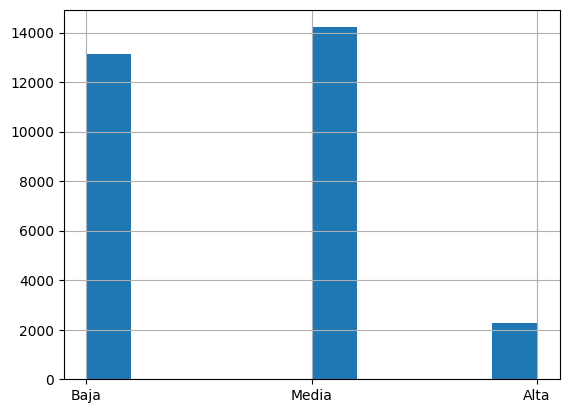

In [19]:
df_ud['importancia'].hist()

<Axes: >

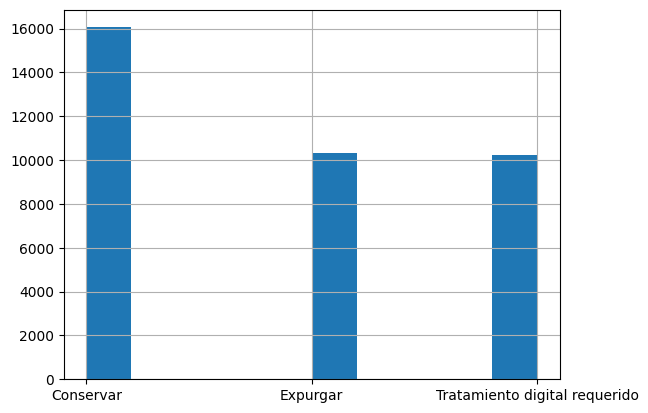

In [200]:
df_ud['tratamiento'].hist()

<Axes: >

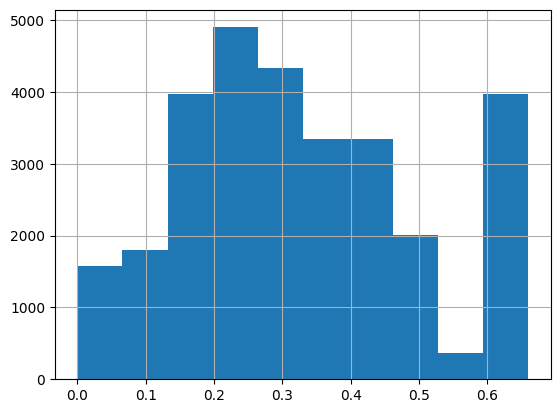

In [21]:
df_ud['porcentaje_datos_personales'].hist()

<Axes: >

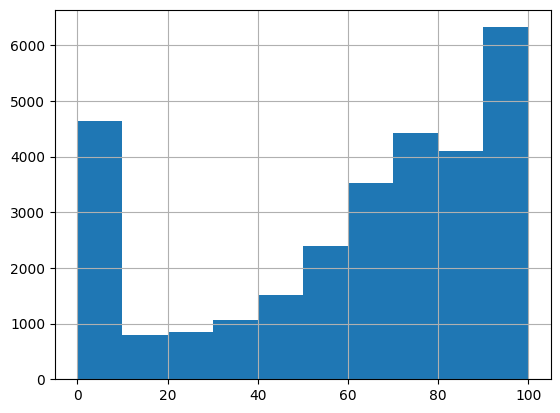

In [22]:
df_ud['porcentaje_ilegible'].hist()

In [23]:
# Creamos un diccionario mapeando id_subserie a retención en el archivo .csv
retencion_por_subserie = df_ssub.set_index('id_subserie')['retencion'].to_dict()

# Completamos los nulos usando el mapeo
df_exp['retención'] = df_exp['retención'].fillna(
    df_exp['id_subserie'].map(retencion_por_subserie)
)

In [215]:
# 2. Fusionar las tablas para obtener la información necesaria
unidades_con_info = pd.merge(
    df_ud,
    df_exp[['id', 'retención', 'estado']],  # Seleccionar columnas relevantes
    left_on='id_expediente',  # Columna en unidades_documentales
    right_on='id',            # Columna en expedientes
    how='left'
)

# 3. Crear la nuevas columnas retención y estado

df_ud['retencion'] = df_ud['id_expediente'].map(df_exp.set_index('id')['retención']).astype(int)
df_ud['estado'] = df_ud['id_expediente'].map(df_exp.set_index('id')['estado']).astype(str)

estado
Cerrado    23304
Abierto     6329
Name: count, dtype: int64


(array([23304.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6329.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

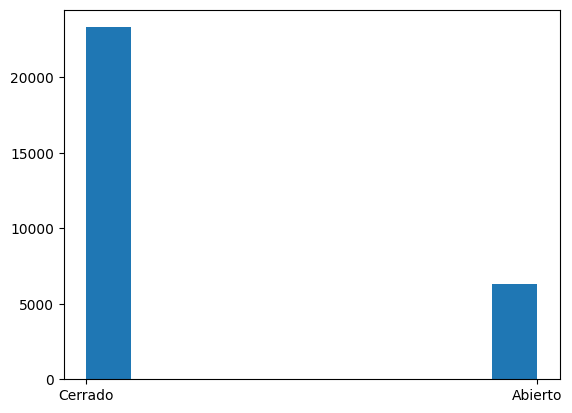

In [25]:
# Vemos los valores que obtenemos, que pueden ser 'abierto' y 'cerrado'
print(df_ud['estado'].value_counts())

# Hacemos gráficos de los resultados
plt.hist(df_ud['estado'])

In [26]:
# Convertimos la columna 'estado' en una columna boleana que diferencie entre abierto/cerrado.
df_ud["estado"] = df_ud["estado"].map({"Cerrado": 0, "Abierto": 1}).astype("int64")

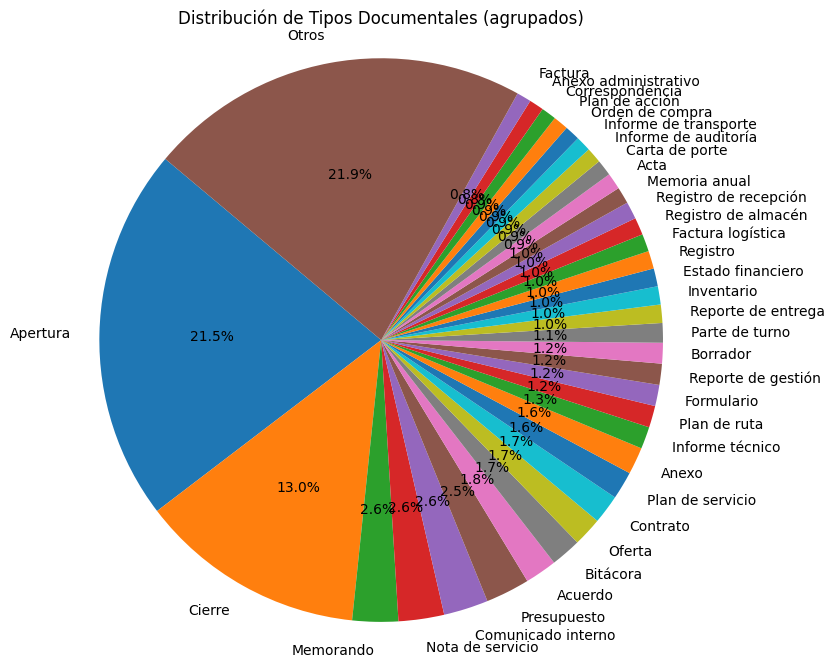

In [27]:
import matplotlib.pyplot as plt

# Exploramos la columna 'tipo documental'

df_ud['tipo_documental'].value_counts()

# Hacemos un gráfico con los resultados

# Calcular proporciones
tipo_counts = df_ud['tipo_documental'].value_counts(normalize=True)

# Separar los que superan el umbral
umbral = 0.008  # 0.8%
tipos_principales = tipo_counts[tipo_counts >= umbral]
tipos_menores = tipo_counts[tipo_counts < umbral]

# Agrupar los tipos menores como "Otros"
tipo_final = tipos_principales.copy()
tipo_final['Otros'] = tipos_menores.sum()

# Graficar
plt.figure(figsize=(8, 8))
plt.pie(tipo_final, labels=tipo_final.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Tipos Documentales (agrupados)')
plt.axis('equal')
plt.show()

En el gráfico podemos ver que hay dos tipos documentales que destacan sobre el resto:

* Apertura
* Cierre

Después podemos estudiar qué tratamiento tienen en general los documentos que pertenecen a Apertura/Cierre. 

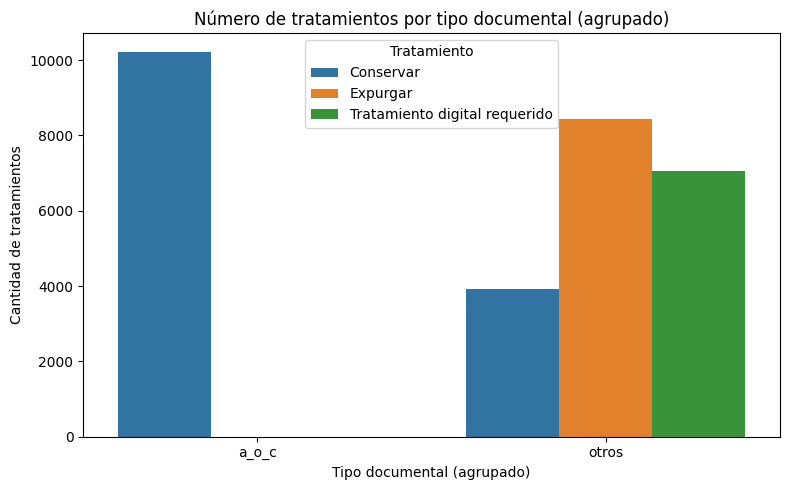

In [28]:
'''
Creamos una nueva columna llamada 'tipo_agregado' que diferencie entre lo que son
tipos documentales rutinarios, como Apertura y Cierre que aparecen en todos los expedientes, y los
que son típicos propiamente de diferentes subseries, o responden a otra cosa
'''

df_ud["tipo_agregado"] = df_ud["tipo_documental"].apply(lambda x: "a_o_c" if x in ["Apertura", "Cierre"] else "otros")

# Vamos a agruparlo por tipo de tratamiento para ver si tiene un tratamiento muy diferenciado.
conteo = df_ud.groupby(["tipo_agregado", "tratamiento"]).size().reset_index(name="cuenta")

# Hacemos el gráfico.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=conteo, x="tipo_agregado", y="cuenta", hue="tratamiento")
plt.title("Número de tratamientos por tipo documental (agrupado)")
plt.xlabel("Tipo documental (agrupado)")
plt.ylabel("Cantidad de tratamientos")
plt.legend(title="Tratamiento")
plt.tight_layout()
plt.show()


Con este simple análisis vemos que por lo menos el 33% de la documentación generada, que se hace en forma de documentos de apertura o cierre siguen un tratamiento predefinido, da igual su estado de conservación o los posibles datos personales que contienen. Por lo tanto el tratamiento 'Conservar' **siempre** va a representarse en mayor número que el resto. 

Esto responde a la política de ciertas empresas, como es el caso, de guardar un testigo de toda la documentación que generan. Esta práctica se solía hacer cuando los documentos se generaban y custodiaban en papel, pero en la actualidad el 'poco espacio' y lo 'barato' que resulta el almacenamiento digital hacen que se tienda a guardar todo el expediente. En este trabajo no se ha marcado esa tendencia.

El hecho de guardar estos dos documentos como testigo se puede reemplazar por lo que se llama 'libro registro de documentación', que da fe de la existencia y contenido que estos expedientes tenían y se pueden expurgar. Tampoco siguen esta política, así que nos adaptaremos a lo que hay.

In [29]:
# Creamos una columna que diferencie lo que es 'Apertura' y 'Cierre' del resto de los tipos documentales.

df_ud["es_aoc"] = df_ud["tipo_documental"].apply(lambda x: 0 if x in ["Apertura", "Cierre"] else 1).astype("int64")


In [214]:
df_ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29633 entries, 0 to 29632
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           29633 non-null  int64  
 1   id_expediente                29633 non-null  int64  
 2   nombre                       29633 non-null  object 
 3   tipo_documental              29633 non-null  object 
 4   fecha_creacion               29633 non-null  object 
 5   porcentaje_datos_personales  29633 non-null  float64
 6   porcentaje_ilegible          29633 non-null  float64
 7   importancia                  29633 non-null  object 
 8   tratamiento                  29633 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [217]:
# Crear una variable para marcar el periodo de retención (Si está o no en el periodo)

from datetime import datetime

anio_actual = datetime.now().year

# Asegurarse de que la columna 'fecha_creacion' esté en formato datetime
df_ud['fecha_creacion'] = pd.to_datetime(df_ud['fecha_creacion'], errors='coerce')

# Extraer el año de la fecha
df_ud['anio_creacion'] = df_ud['fecha_creacion'].dt.year

# Calcular si está en retención
df_ud['en_retencion'] = (anio_actual - df_ud['anio_creacion']) <= df_ud['retencion']

<Axes: xlabel='en_retencion'>

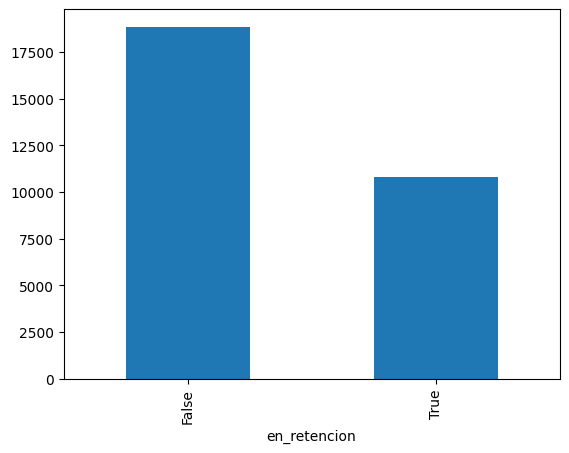

In [222]:
df_ud['en_retencion'].value_counts().plot(kind='bar')

In [225]:
from sklearn.preprocessing import OrdinalEncoder
# Quitamos las referencias tanto a id como a id_expediente
df_ud = df_ud.drop(columns=['id', 'id_expediente', 'retencion'])

# Codificamos los tratamientos y las importancias, pues son categóricas
encoder = OrdinalEncoder()
df_ud['tratamiento_doc'] = encoder.fit_transform(df_ud[['tratamiento']]).astype(int)
df_ud['importancia_doc'] = encoder.fit_transform(df_ud[['importancia']]).astype(int)

In [226]:
df_ud = df_ud.select_dtypes(include=['int', 'int64', 'float64', 'bool'])

In [227]:
df_ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29633 entries, 0 to 29632
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   porcentaje_datos_personales  29633 non-null  float64
 1   porcentaje_ilegible          29633 non-null  float64
 2   anio_creacion                29633 non-null  int32  
 3   en_retencion                 29633 non-null  bool   
 4   tratamiento_doc              29633 non-null  int32  
 5   importancia_doc              29633 non-null  int32  
dtypes: bool(1), float64(2), int32(3)
memory usage: 839.3 KB


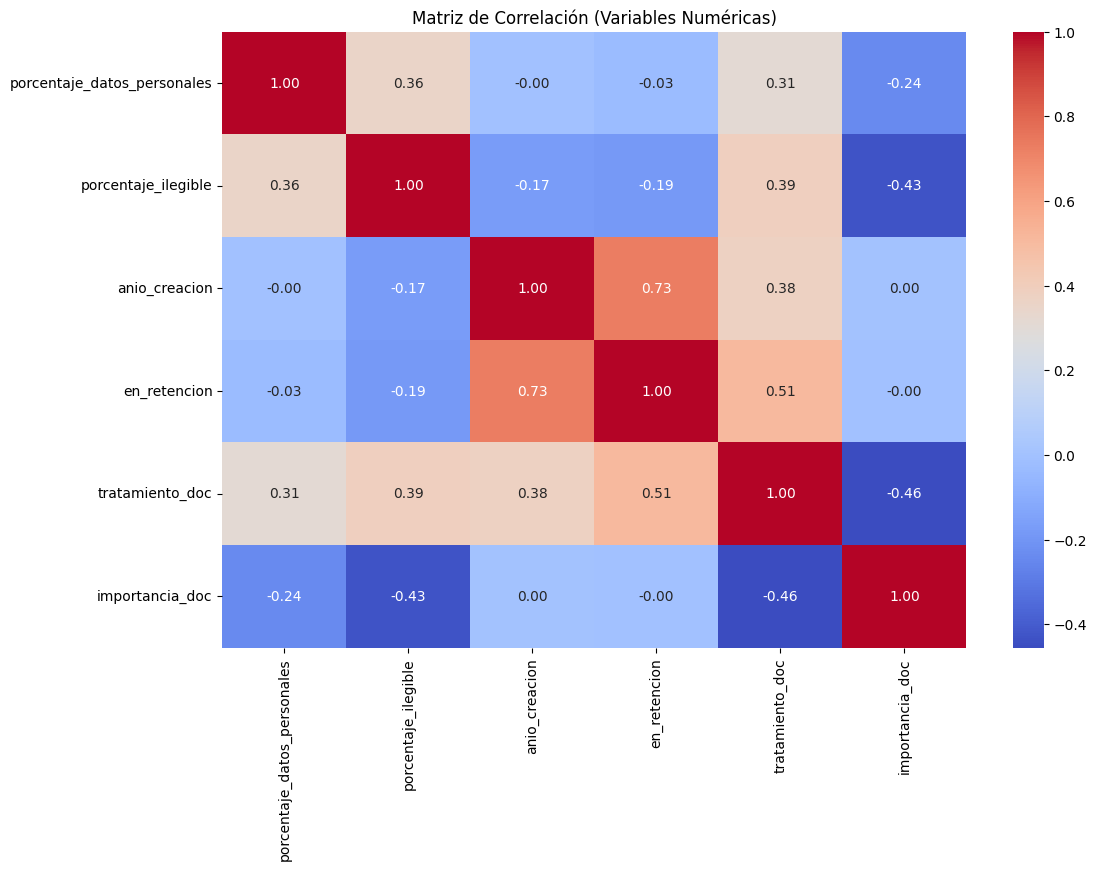

In [228]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_ud.corr(),annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

In [229]:
# sns.pairplot(df_ud, hue='tratamiento_doc')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EB20F57740> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



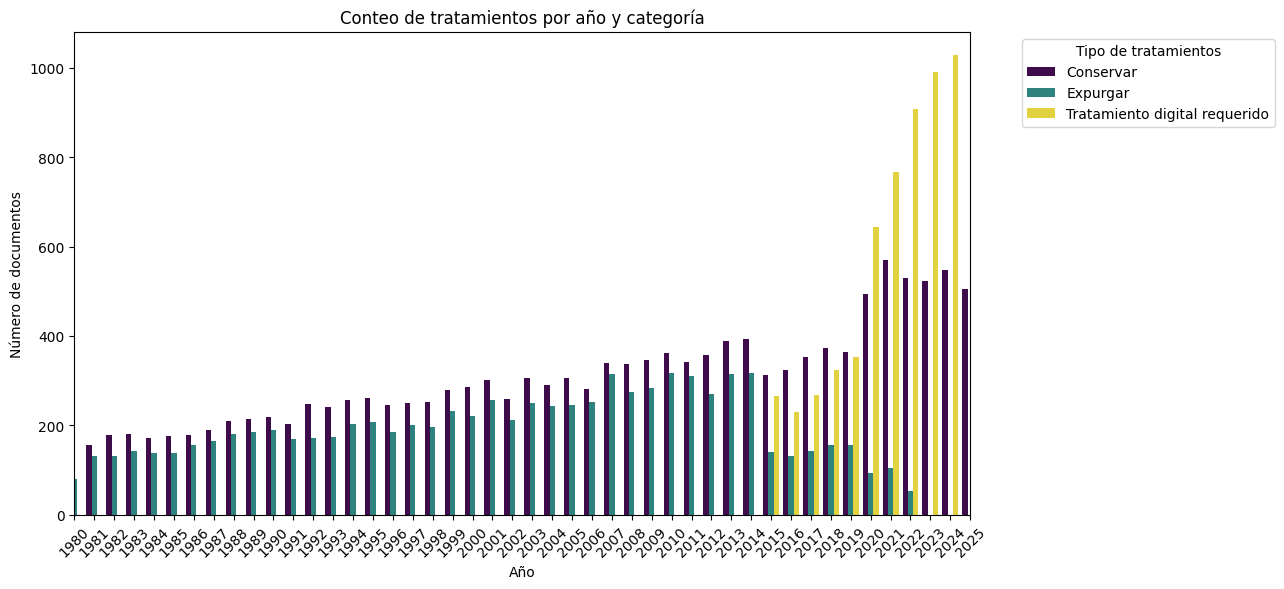

In [234]:
df_counts = df_ud.groupby(['anio_creacion', 'tratamiento_doc']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_counts,
    x='anio_creacion',
    y='count',
    hue='tratamiento_doc',
    palette='viridis',
    hue_order=[0, 1, 2]  # Esto asegura el orden correcto
)


plt.title("Conteo de tratamientos por año y categoría")
plt.xlabel("Año")
plt.ylabel("Número de documentos")
plt.xlim('1980','2025')
plt.legend(title='Tipo de tratamientos', bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45)
plt.tight_layout()

# Obtener la leyenda actual y modificar las etiquetas
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Conservar', 'Expurgar', 'Tratamiento digital requerido']
ax.legend(handles, new_labels, title='Tipo de tratamientos', bbox_to_anchor=(1.05, 1))

plt.show()

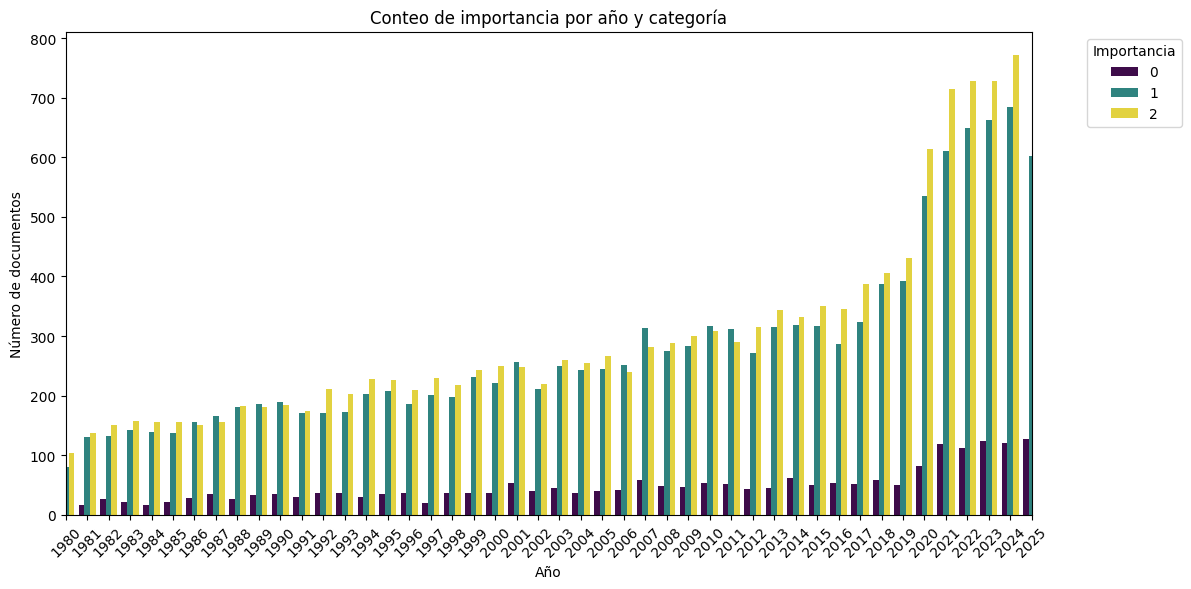

In [ ]:
df_counts = df_ud.groupby(['anio_creacion', 'importancia_doc']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_counts,
    x='anio_creacion',
    y='count',
    hue='importancia_doc',
    palette='viridis'
)


plt.title("Conteo de importancia por año y categoría")
plt.xlabel("Año")
plt.ylabel("Número de documentos")
plt.xlim('1980','2025')
plt.legend(title='Importancia', bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Datos con nulos y con errores humanos.

Estos datos son los que suponen un mayor problema, además se parecen más a lo que nos podemos encontrar en la vida real. En las empresas e instituciones los procesos de selección, descripción y expurgo documental están sujetos a una serie de condiciones externas y trabajo manual que provocan generalmente errores o pérdidas de datos que son necesarios para la categorización y posterior tratamiento de los documentos. 

El trabajo de ML consiste en crear un modelo que sea capaz de encontrar ese error humano a pesar de que nosotros solo le estemos dando datos. Un modelo que además de predecir el tratamiento óptimo de un documento en concreto, sea capaz de discernir si corresponde o no con el marcado, en qué porcentaje y tratarlo como error humano. Ofreciendo después alternativas para su reclasificación manual. 

Para ello se necesitará una limpieza y un relleno de nulos más complejo que añadiremos sobre lo que ya tenemos.

In [ ]:
# df_exp_error
df_ud_error.head()

,id,id_expediente,nombre,tipo_documental,fecha_creacion,porcentaje_datos_personales,porcentaje_ilegible,importancia,tratamiento
0,1,12,Apertura de proceso Documentación administrati...,Apertura,1980-01-08,0.214806,69.000000,Alta,Conservar
1,2,12,Reporte de cumplimiento segundo trimestre [ZMF],Reporte de cumplimiento,1980-03-20,0.485025,90.724368,Media,Conservar
2,3,12,Comprobante de evaluación [V30],Comprobante,1980-05-02,0.337680,88.093672,Baja,Expurgar
3,4,12,Comprobante de selección [GCX],NaN,1980-05-13,0.420574,96.724464,Media,Conservar
4,5,12,Comprobante de despido [4FM],Comprobante,1981-01-20,0.384561,90.562006,Baja,Expurgar


In [ ]:
df_exp_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   8000 non-null   int64 
 1   codigo               8000 non-null   object
 2   titulo               8000 non-null   object
 3   id_subserie          8000 non-null   int64 
 4   fecha_apertura       8000 non-null   object
 5   fecha_cierre         4833 non-null   object
 6   estado               8000 non-null   object
 7   productor            8000 non-null   object
 8   descripcion_resumen  8000 non-null   object
 9   retención            8000 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 625.1+ KB


In [ ]:
df_ud_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36621 entries, 0 to 36620
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           36621 non-null  int64  
 1   id_expediente                36621 non-null  int64  
 2   nombre                       36621 non-null  object 
 3   tipo_documental              32197 non-null  object 
 4   fecha_creacion               36621 non-null  object 
 5   porcentaje_datos_personales  32930 non-null  float64
 6   porcentaje_ilegible          33735 non-null  float64
 7   importancia                  36490 non-null  object 
 8   tratamiento                  36621 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
# Proceso de limpieza general, aplicado en forma de función para futuras bases de datos, no en pasos como la anterior

# Función modelo_pruebas para limpiar los datos si hay nulos

def modelo_pruebas(df_exp_error, df_ud_error, df_ssub):
    """Función mejorada con manejo de valores nulos mediante imputación predictiva"""
    from datetime import datetime
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    from sklearn.ensemble import RandomForestClassifier
    import pandas as pd
    import numpy as np

    # 1. Mapeo de retención por subserie
    retencion_por_subserie = df_ssub.set_index('id_subserie')['retencion'].to_dict()

    # 2. Completar nulos en retención
    df_exp_error['retención'] = df_exp_error['retención'].fillna(
        df_exp_error['id_subserie'].map(retencion_por_subserie)
    )

    # 3. Fusionar tablas CORRECTAMENTE (asignando a df_ud_error)
    df_ud_error = pd.merge(
        df_ud_error,
        df_exp_error[['id', 'retención', 'estado']].rename(columns={'id': 'id_exp'}),
        left_on='id_expediente',
        right_on='id_exp',
        how='left'
    ).drop(columns=['id_exp'])
    
    # 4. Verificar existencia de columnas ANTES de usarlas
    if 'estado' not in df_ud_error.columns:
        raise ValueError("Columna 'estado' no encontrada después del merge. Verifica los DataFrames de entrada.")
    
    # Convertir retención (ahora viene del merge)
    df_ud_error['retencion'] = df_ud_error['retención'].astype(int)
    df_ud_error = df_ud_error.drop(columns=['retención']) 
    
    # Mapear estado con verificación de valores
    estado_map = {"Cerrado": 0, "Abierto": 1}
    df_ud_error["estado"] = df_ud_error["estado"].map(estado_map).astype("int64")

    # 6. Procesamiento de fechas
    anio_actual = datetime.now().year
    df_ud_error['fecha_creacion'] = pd.to_datetime(df_ud_error['fecha_creacion'], errors='coerce')
    df_ud_error['anio_creacion'] = df_ud_error['fecha_creacion'].dt.year
    df_ud_error['en_retencion'] = (anio_actual - df_ud_error['anio_creacion']) <= df_ud_error['retencion']

    # 7. Manejo de valores nulos en porcentajes
    for col in ['porcentaje_datos_personales', 'porcentaje_ilegible']:
        df_ud_error[col] = df_ud_error[col].fillna(df_ud_error[col].median())  # Imputación con mediana

    # 8. Codificación e imputación predictiva para tipo_documental e importancia
    # Separar datos con y sin valores nulos
    known_data = df_ud_error[df_ud_error['tipo_documental'].notna()]
    unknown_data = df_ud_error[df_ud_error['tipo_documental'].isna()]
    
    # Codificación
    encoder = OrdinalEncoder()
    if not known_data.empty:
        known_data.loc[:, 'doctip'] = encoder.fit_transform(known_data[['tipo_documental']]).astype(int)
        
        # Si hay datos desconocidos, predecirlos
        if not unknown_data.empty:
            # Seleccionar características relevantes para predecir tipo_documental
            features = ['retencion', 'porcentaje_datos_personales', 'porcentaje_ilegible', 'anio_creacion']
            
            # Entrenar modelo predictivo
            X_train = known_data[features]
            y_train = known_data['doctip']
            
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            
            # Predecir valores faltantes
            X_unknown = unknown_data[features]
            predicted = model.predict(X_unknown)
            unknown_data.loc[:, 'doctip'] = predicted
            unknown_data.loc[:, 'tipo_documental'] = encoder.inverse_transform(predicted.reshape(-1, 1))
            
        # Combinar datos
        df_ud_error = pd.concat([known_data, unknown_data])
    else:
        # Caso extremo: todos los valores son nulos
        df_ud_error['doctip'] = 0  # Valor por defecto

    # 9. Imputación para importancia
    if 'importancia' in df_ud_error.columns:
        # Codificación
        encoder_imp = OrdinalEncoder(categories=[['Alta', 'Media', 'Baja']]) # Se han puesto categorías, estaban fastidiando toda la predicción
        known_imp = df_ud_error[df_ud_error['importancia'].notna()]
        
        if not known_imp.empty:
            # Codificar importancia en known_imp
            known_imp.loc[:, 'importancia_doc'] = encoder_imp.fit_transform(known_imp[['importancia']]).astype(int)
            
            # Actualizar df_ud_error con los valores codificados
            df_ud_error.loc[known_imp.index, 'importancia_doc'] = known_imp['importancia_doc']
            
            # Imputar valores faltantes
            '''
            InteractiveImputer se usa para imputar (rellenar) valores faltantes en un DataFrame de forma inteligente y multivariada.
            Para cada variable con valores faltantes, entrena un modelo (por defecto, una regresión bayesiana) usando las otras variables como predictores.
            Rellena los valores faltantes de esa variable con las predicciones del modelo.
            Repite el proceso de forma iterativa para afinar los valores imputados, hasta que converge o alcanza un número máximo de iteraciones.
            '''
            columnas_para_imputar = ['doctip', 'porcentaje_datos_personales', 'porcentaje_ilegible']  # o lo que tengas relevante

            # Solo imputamos en registros que tengan al menos alguna columna no nula
            for col in columnas_para_imputar:
                if col not in df_ud_error.columns:
                    raise ValueError(f"La columna '{col}' no está en df_ud_error")
            df_aux = df_ud_error[columnas_para_imputar].copy()
            df_aux_valid = df_aux[df_aux.notna().any(axis=1)]

            imp_imputer = IterativeImputer(random_state=42)
            df_imputado = imp_imputer.fit_transform(df_aux_valid)

            df_aux.loc[df_aux_valid.index] = df_imputado
            df_ud_error[columnas_para_imputar] = df_aux
            df_ud_error['importancia_doc'] = df_ud_error['importancia_doc'].fillna(1)  # Por ejemplo: "Media"

        else:
            df_ud_error['importancia_doc'] = 0

    # 10. Limpieza final - PRESERVAR ID
    df_ud_error_clean = df_ud_error.drop(columns=['id_expediente'], errors='ignore')  # Solo eliminamos id_expediente
    df_ud_error_clean = df_ud_error_clean.rename(columns={'id': 'id_ud'})  # Renombrar para claridad
    
    # 11. Codificación de tratamiento
    encoder_trat = OrdinalEncoder()
    df_ud_error_clean.loc[df_ud_error_clean['tratamiento'] == 'Revisar', 'tratamiento'] = 'Conservar'
    df_ud_error_clean['tratamiento_doc'] = encoder_trat.fit_transform(df_ud_error_clean[['tratamiento']]).astype(int)
    from joblib import dump
    dump(encoder_trat, "encoder_tratamiento.joblib")
    
    # 12. Corrección de valores
    df_ud_error_clean = df_ud_error_clean.drop(columns=df_ud_error.select_dtypes(include=['object','datetime64[ns]']).columns)

    return df_ud_error_clean


In [ ]:
df_ud_clean = modelo_pruebas(df_exp_error, df_ud_error, df_ssub)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_data.loc[:, 'doctip'] = encoder.fit_transform(known_data[['tipo_documental']]).astype(int)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data.loc[:, 'doctip'] = predicted
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
df_ud_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36621 entries, 0 to 36613
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_ud                        36621 non-null  int64  
 1   porcentaje_datos_personales  36621 non-null  float64
 2   porcentaje_ilegible          36621 non-null  float64
 3   estado                       36621 non-null  int64  
 4   retencion                    36621 non-null  int32  
 5   anio_creacion                36621 non-null  int32  
 6   en_retencion                 36621 non-null  bool   
 7   doctip                       36621 non-null  int32  
 8   importancia_doc              36621 non-null  float64
 9   tratamiento_doc              36621 non-null  int32  
dtypes: bool(1), float64(3), int32(4), int64(2)
memory usage: 3.3 MB


Una vez rellenados los nulos y limpiado el dataset correspondiente, podemos pasar a elaborar el modelo.

En esta sección, llamada EDA hemos estudiado las variables que contiene el dataset, tanto de forma univariable como bivariable, realizando un estudio preliminar completo de las mismas.

Hemos constatado las pocas variables que tenemos en df_ud para hallar el tratamiento final, por lo que hemos generado unas variables numéricas (anio_creacion, estado, en_retencion, doct y retencion). Creando una función que impute los nulos que faltan. 

In [ ]:
df_ud_clean['tratamiento_doc'].value_counts()

tratamiento_doc
0    16058
1    10323
2    10240
Name: count, dtype: int64

## **Modelado**

¿Cuál es el objetivo del modelado?

La empresa nos ha pasado un csv con una clasificación perfecta, han invertido muchísimo dinero en un equipo de documentalistas y auditores que han creado y revisado el tratamiento documental que se le daba a las unidades documentales día a día. Todo esto con el fin de crear un modelo base que sirva para auditar y corregir otras bases de datos, de otras subsidiarias, en las que no han invertido tanto dinero en el ámbito de gestión documental. 

Para ello, tendremos que entrenar un modelo supervisado con la base de datos perfecta (sin errores, ni nulos) y después un modelo no supervisado que encuentre los outliers en las bases de datos que contienen errores, para realizar una 'auditoría', calcular el error humano y proponer los valores correctos. 

Esto nos permitirá cierta elasticidad en las predicciones, haciendo que:

* Se evalúe la coherencia interna de las decisiones de las nuevas bbdd.

* Se detecten desviaciones y errores sin saber exactamente cómo definen los criterios.

* Se generalice a nuevas empresas sin pedirles que ajusten sus criterios a los tuyos.

### Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

df_ud = pd.read_csv('un_doc_se.csv')
df_exp = pd.read_csv('exp.csv')
df_ssub = pd.read_csv('subserie.csv')

df_ud_clean = modelo_pruebas(df_exp, df_ud, df_ssub)

X = df_ud_clean.drop(columns=['tratamiento_doc'])
y = df_ud_clean['tratamiento_doc']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# ¿Está desbalanceada?

pd.Series(y).value_counts(normalize=True)

# No parece que el desbalanceo sea notorio

tratamiento_doc
0    0.477171
1    0.284716
2    0.238113
Name: proportion, dtype: float64

### Entrenamiento de la base de datos perfecta

Vamos a probar a entrenar el modelo con una base de datos perfecta, viendo qué modelos y parámetros son los mejores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir los modelos y sus respectivas grillas de parámetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),  # verbose=0 para silenciar output durante grid search
        'params': {
            'iterations': [100, 200],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1],
            'l2_leaf_reg': [1, 3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

results = []

for model_name, config in models.items():
    print(f"\nEntrenando {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_
    from joblib import dump
    dump(best_model, f"modelo_{model_name.lower()}.joblib")
    
    # Predecir en train y test
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calcular accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Guardar resultados
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'best_model': best_model
    })
    
    print(f"\nResultados para {model_name}:")
    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
    print(f"Precisión en prueba: {test_accuracy:.4f}")
    print("-" * 50)

# Mostrar resumen comparativo
print("\nResumen Comparativo:")
print("{:<15} {:<15} {:<15} {:<15}".format('Modelo', 'Train Acc', 'Test Acc', 'Diferencia'))
for result in results:
    diff = result['train_accuracy'] - result['test_accuracy']
    print("{:<15} {:<15.4f} {:<15.4f} {:<15.4f}".format(
        result['model'], result['train_accuracy'], result['test_accuracy'], diff))


Entrenando RandomForest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Resultados para RandomForest:
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisión en entrenamiento: 1.0000
Precisión en prueba: 1.0000
--------------------------------------------------

Entrenando CatBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Resultados para CatBoost:
Mejores parámetros: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Precisión en entrenamiento: 1.0000
Precisión en prueba: 1.0000
--------------------------------------------------

Entrenando XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Resultados para XGBoost:
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Precisión en entrenamiento: 1.0000
Precisión en prueba: 1.0000
-------------------------------------------

In [ ]:
# Se prueba el entrenamiento que hemos hecho sobre otra base de datos, de la que rellenamos los nulos y dividimos en train/test

from sklearn.model_selection import train_test_split

df_exp = pd.read_csv('expediente_p2.csv')
df_ud = pd.read_csv('unidades_con_errores.csv')
df_ssub = pd.read_csv('subserie.csv')

df_ud_clean = modelo_pruebas(df_exp, df_ud, df_ssub)

X = df_ud_clean.drop(columns=['tratamiento_doc'])
y = df_ud_clean['tratamiento_doc']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_data.loc[:, 'doctip'] = encoder.fit_transform(known_data[['tipo_documental']]).astype(int)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data.loc[:, 'doctip'] = predicted
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
# Predecimos los resultados, para comparar cuánto se equivoca
# Predecir en train y test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en prueba: {test_accuracy:.4f}")

Precisión en entrenamiento: 0.8996
Precisión en prueba: 0.8905


Vemos que nuestra modelo de predicción no encuentra los errores y que por suerte aa veces el test acierta más que el train, hay que solucionar eso

### Entrenamiento con bases de datos que no se adaptan, contienen fallos y nulos

In [ ]:
y_pred = best_model.predict(X)
proba = best_model.predict_proba(X).max(axis=1)

In [ ]:

import pandas as pd
import numpy as np
from joblib import load, dump
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder

def entrenar_modelos_isolationforest(X_train, y_train, guardar=True, prefix='modelo_outlier'):
    """
    Entrena dos modelos de IsolationForest:
    1. Usando solo X_train
    2. Usando X_train concatenado con y_train codificado
        ¿Por qué IsolationForest?
        IsolationForest ha sido elegido por su:
        Eficiencia
        Robustez
        Naturaleza no supervisada
        Buena integración en un sistema híbrido de clasificación + auditoría
        No supervisado - No necesitamos etiquetar previamente qué registros están mal. El modelo aprende el comportamiento "normal" y detecta desviaciones.
        Integra bien con clasificación supervisada - Se usa como segunda capa de validación, en combinación con un clasificador (ej. CatBoost), para detectar casos dudosos con baja confianza o anomalías.
        Es especialmente útil en entornos donde se requiere revisar decisiones potencialmente incorrectas sin contar con etiquetas fiables de error.
        ¿Qué hace IsolationForest?
            IsolationForest es un algoritmo de detección de anomalías no supervisado que:
            Aísla observaciones aleatorias mediante árboles de decisión.
Las observaciones que requieren menos particiones para ser aisladas son consideradas outliers.
    Parámetros:
        X_train (pd.DataFrame): Variables predictoras
        y_train (pd.Series): Etiquetas de tratamiento
        guardar (bool): Si True, guarda los modelos como archivos .joblib
        prefix (str): Prefijo para los nombres de los archivos guardados

    Retorna:
        dict con ambos modelos y el encoder usado para y_train
    """
    modelos = {}

    # Modelo 1: Solo X_train
    iso_X = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    iso_X.fit(X_train)
    modelos['solo_X'] = iso_X

    # Modelo 2: X_train + y_train codificado
    encoder_y = OrdinalEncoder()
    y_encoded = encoder_y.fit_transform(y_train.to_frame())

    X_con_y = X_train.copy()
    X_con_y['y_train_encoded'] = y_encoded

    iso_Xy = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    iso_Xy.fit(X_con_y)
    modelos['X_mas_y'] = iso_Xy
    modelos['encoder_y'] = encoder_y

    if guardar:
        dump(iso_X, f"{prefix}_solo_X.joblib")
        dump(iso_Xy, f"{prefix}_X_mas_y.joblib")
        dump(encoder_y, f"{prefix}_encoder_y.joblib")

    return modelos


def auditar_o_predecir_base(df_limpia, modelo_clasificador, modelo_outlier, encoder_tratamiento, umbral_confianza=0.65, prefix='modelo_outlier'):
    """
    Realiza auditoría o clasificación automática de tratamiento documental:
    - Si la base tiene 'tratamiento_doc', compara y detecta errores.
    - Si no lo tiene, solo predice y marca outliers y casos de baja confianza.

    Parámetros:
        df_limpia (DataFrame): Base preprocesada (output de modelo_pruebas).
        modelo_clasificador: Clasificador entrenado (ej. RandomForest).
        modelo_outlier: IsolationForest entrenado (con X o X+y).
        encoder_tratamiento: Encoder usado para el target.
        umbral_confianza (float): Confianza mínima aceptable.

    Retorna:
        df_resultado con columnas:
        - tratamiento_predicho
        - confianza_prediccion
        - es_outlier
        - revisar
        - (si aplica) tratamiento_original, diferente_a_original
    """
    df_resultado = df_limpia.copy()

    # Separar y si existe
    y_real = None
    if 'tratamiento_doc' in df_limpia.columns:
        y_real = df_limpia['tratamiento_doc']
        X = df_limpia.drop(columns=['tratamiento_doc'])
    else:
        X = df_limpia

    # Predicción
    y_pred = modelo_clasificador.predict(X)
    y_proba = modelo_clasificador.predict_proba(X).max(axis=1)

    # Outlier detection
    es_outlier = modelo_outlier.predict(X) == -1

    # Construcción del resultado
    df_resultado['tratamiento_predicho'] = encoder_tratamiento.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    df_resultado['confianza_prediccion'] = y_proba
    df_resultado['es_outlier'] = es_outlier

    if y_real is not None:
        diferentes = y_real != y_pred.ravel()
        df_resultado['diferente_a_original'] = diferentes
        df_resultado['tratamiento_original'] = encoder_tratamiento.inverse_transform(y_real.to_numpy().reshape(-1, 1)).ravel()
        df_resultado['revisar'] = diferentes | es_outlier | (y_proba < umbral_confianza)
    else:
        df_resultado['revisar'] = es_outlier | (y_proba < umbral_confianza)

    return df_resultado


In [ ]:
# Se vuelve a cargar y partir la base de datos con fallos para realizar el entrenamiento con outliers.

from sklearn.model_selection import train_test_split

df_exp = pd.read_csv('expediente_p2.csv')
df_ud = pd.read_csv('unidades_con_errores.csv')
df_ssub = pd.read_csv('subserie.csv')

df_ud_clean = modelo_pruebas(df_exp, df_ud, df_ssub)

X = df_ud_clean.drop(columns=['tratamiento_doc'])
y = df_ud_clean['tratamiento_doc']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_data.loc[:, 'doctip'] = encoder.fit_transform(known_data[['tipo_documental']]).astype(int)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data.loc[:, 'doctip'] = predicted
C:\Users\Francisco\AppData\Local\Temp\ipykernel_9888\2114319998.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
from joblib import load

entrenar_modelos_isolationforest(X_train, y_train, guardar=True)

# Cargar modelo clasificador entrenado
best_model = load("modelo_catboost.joblib")  # o el nombre con el que guardaste tu modelo

# Cargar modelo de outliers
modelo_outlier = load("modelo_outlier_solo_X.joblib")  # el que entrenaste previamente

# Cargar encoder de tratamiento
encoder_tratamiento = load("encoder_tratamiento.joblib")

# Ejecutar auditoría
resultado = auditar_o_predecir_base(
    df_ud_clean,
    best_model,
    modelo_outlier,
    encoder_tratamiento,
    umbral_confianza=0.65
)

# Mostrar los documentos marcados como dudosos
resultado_dudoso = resultado
resultado_dudoso.head()

,id_ud,porcentaje_datos_personales,porcentaje_ilegible,estado,retencion,anio_creacion,en_retencion,doctip,importancia_doc,tratamiento_doc,tratamiento_predicho,confianza_prediccion,es_outlier,diferente_a_original,tratamiento_original,revisar
0,1,0.214806,69.000000,0,10,1980,False,7,0.0,0,Conservar,0.999835,True,False,Conservar,True
1,2,0.485025,90.724368,0,10,1980,False,69,1.0,0,Conservar,0.999175,True,False,Conservar,True
2,3,0.337680,88.093672,0,10,1980,False,12,2.0,1,Expurgar,0.999612,True,False,Expurgar,True
4,5,0.384561,90.562006,0,10,1981,False,12,2.0,1,Expurgar,0.999612,True,False,Expurgar,True
5,6,0.298524,0.000000,0,10,1981,False,11,0.0,0,Conservar,0.999846,True,False,Conservar,True


In [ ]:
resultado_dudoso[resultado_dudoso['es_outlier']==False]

,id_ud,porcentaje_datos_personales,porcentaje_ilegible,estado,retencion,anio_creacion,en_retencion,doctip,importancia_doc,tratamiento_doc,tratamiento_predicho,confianza_prediccion,es_outlier,diferente_a_original,tratamiento_original,revisar
1113,1114,0.298524,65.086331,0,10,1985,False,11,1.0,0,Conservar,0.999213,False,False,Conservar,False
1822,1823,0.172225,67.000000,0,10,1986,False,7,1.0,0,Conservar,0.999794,False,False,Conservar,False
1925,1926,0.312373,73.394016,0,10,1986,False,14,1.0,0,Conservar,0.999191,False,False,Conservar,False
2040,2041,0.262866,81.412545,0,10,1987,False,32,1.0,0,Conservar,0.999175,False,False,Conservar,False
2046,2047,0.298524,55.000000,0,10,1987,False,7,1.0,0,Conservar,0.999794,False,False,Conservar,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36351,36352,0.298524,44.588473,0,10,2026,True,56,2.0,2,Tratamiento digital requerido,0.999828,False,False,Tratamiento digital requerido,False
36402,36403,0.600000,65.086331,0,10,2025,True,35,1.0,2,Tratamiento digital requerido,0.999500,False,False,Tratamiento digital requerido,False
36428,36429,0.296482,9.000000,0,10,2025,True,7,1.0,0,Conservar,0.999484,False,False,Conservar,False
36534,36535,0.194781,67.484757,0,10,2026,True,9,1.0,2,Tratamiento digital requerido,0.976662,False,False,Tratamiento digital requerido,False


<Axes: xlabel='diferente_a_original'>

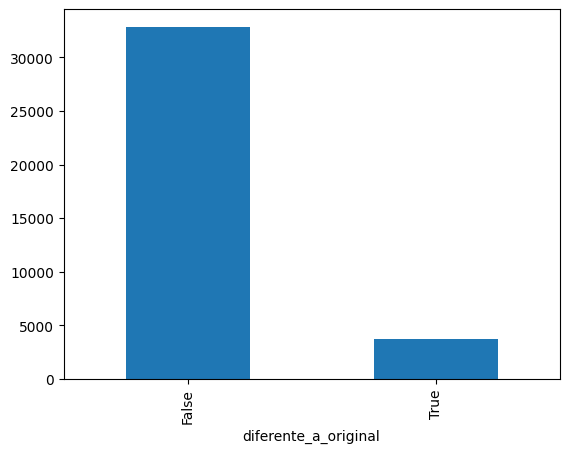

In [235]:
resultado_dudoso['diferente_a_original'].value_counts().plot(kind='bar')

In [ ]:
print('Los resultados cambiados son un',round((3809/36621)*100,2),'%')

Los resultados cambiados son un 10.4 %


In [ ]:
resultado_dudoso[resultado_dudoso['revisar']==True]

,id_ud,porcentaje_datos_personales,porcentaje_ilegible,estado,retencion,anio_creacion,en_retencion,doctip,importancia_doc,tratamiento_doc,tratamiento_predicho,confianza_prediccion,es_outlier,diferente_a_original,tratamiento_original,revisar
0,1,0.214806,69.000000,0,10,1980,False,7,0.0,0,Conservar,0.999835,True,False,Conservar,True
1,2,0.485025,90.724368,0,10,1980,False,69,1.0,0,Conservar,0.999175,True,False,Conservar,True
2,3,0.337680,88.093672,0,10,1980,False,12,2.0,1,Expurgar,0.999612,True,False,Expurgar,True
4,5,0.384561,90.562006,0,10,1981,False,12,2.0,1,Expurgar,0.999612,True,False,Expurgar,True
5,6,0.298524,0.000000,0,10,1981,False,11,0.0,0,Conservar,0.999846,True,False,Conservar,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36587,36588,0.063002,4.000000,0,5,2026,True,11,1.0,0,Conservar,0.998234,True,False,Conservar,True
36594,36595,0.468802,16.906133,0,2,2026,True,7,2.0,2,Tratamiento digital requerido,0.953768,True,False,Tratamiento digital requerido,True
36595,36596,0.298524,5.000000,0,2,2026,True,11,1.0,0,Conservar,0.997748,True,False,Conservar,True
36597,36598,0.316729,52.614142,0,5,2026,True,62,0.0,2,Tratamiento digital requerido,0.999577,True,False,Tratamiento digital requerido,True


Ahora vamos a comparar con un archivo csv que contiene las unidades documentales bien catalogadas

In [ ]:
df_correctos = pd.read_csv("unidades_correctas.csv")

df_comparado = resultado.merge(df_correctos, left_on="id_ud", right_on="id", how="inner")
df_comparado.drop(columns=["id"], inplace=True)

df_comparado["coincide_con_teorico"] = df_comparado["tratamiento_predicho"] == df_comparado["tratamiento_teorico"]

In [ ]:
df_comparado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36621 entries, 0 to 36620
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_ud                        36621 non-null  int64  
 1   porcentaje_datos_personales  36621 non-null  float64
 2   porcentaje_ilegible          36621 non-null  float64
 3   estado                       36621 non-null  int64  
 4   retencion                    36621 non-null  int32  
 5   anio_creacion                36621 non-null  int32  
 6   en_retencion                 36621 non-null  bool   
 7   doctip                       36621 non-null  int32  
 8   importancia_doc              36621 non-null  float64
 9   tratamiento_doc              36621 non-null  int32  
 10  tratamiento_predicho         36621 non-null  object 
 11  confianza_prediccion         36621 non-null  float64
 12  es_outlier                   36621 non-null  bool   
 13  diferente_a_orig

In [ ]:
accuracy = df_comparado["coincide_con_teorico"].mean()
print(f"Porcentaje de coincidencia con el tratamiento teórico: {accuracy:.2%}")

Porcentaje de coincidencia con el tratamiento teórico: 98.90%


<Figure size 800x600 with 0 Axes>

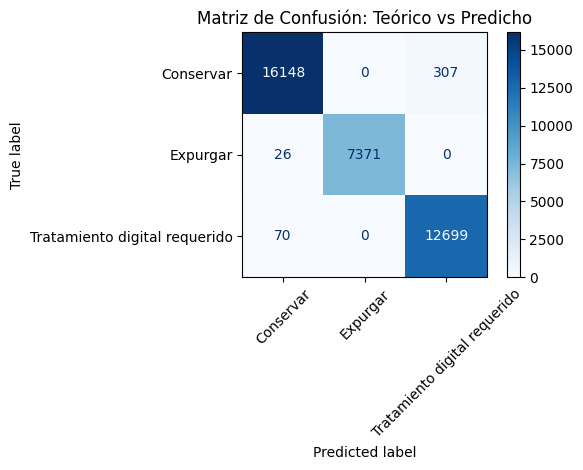

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
labels = sorted(df_comparado["tratamiento_teorico"].unique())
cm = confusion_matrix(df_comparado["tratamiento_teorico"], df_comparado["tratamiento_predicho"], labels=labels)

# Mostrar matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión: Teórico vs Predicho")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Por lo que podemos observar, al modelo le cuesta distinguir sobre todo entre los tratamientos 'Tratamiento digital requerido' y 'Conservar', ya que ambos son posibles dentro de la retención y las condiciones que fijan la una o la otra son más complejas. Habría que vigilar esos que ha predicho como 'Conservar' pero son 'Expurgar', puede que esté cometiendo un error grave, vamos a ver por qué se debe. Aun así, se pueden marcar y revisar a mano, pues son 26 de 38000 ud.

In [ ]:
df_comparado[(df_comparado['tratamiento_predicho'] == 'Conservar')&(df_comparado['tratamiento_teorico'] == 'Expurgar')]

,id_ud,porcentaje_datos_personales,porcentaje_ilegible,estado,retencion,anio_creacion,en_retencion,doctip,importancia_doc,tratamiento_doc,tratamiento_predicho,confianza_prediccion,es_outlier,diferente_a_original,tratamiento_original,revisar,tratamiento_teorico,coincide_con_teorico
478,547,0.194266,100.000000,1,10,1982,False,39,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False
1640,1869,0.400007,74.222336,1,10,1986,False,2,1.0,0,Conservar,0.998572,True,False,Conservar,True,Expurgar,False
2450,2792,0.228199,90.651707,0,10,1989,False,13,1.0,0,Conservar,0.999191,False,False,Conservar,False,Expurgar,False
2859,3250,0.600000,90.220187,0,2,1990,False,40,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False
3558,4040,0.462309,100.000000,0,3,1994,False,44,1.0,0,Conservar,0.999175,True,False,Conservar,True,Expurgar,False
3798,4308,0.350818,100.000000,0,5,1994,False,62,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False
4777,5419,0.494948,65.086331,0,10,1996,False,13,1.0,0,Conservar,0.999191,False,False,Conservar,False,Expurgar,False
5347,6073,0.369061,89.070688,1,5,1998,False,37,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False
5621,6376,0.296130,100.000000,0,3,1999,False,71,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False
6072,6904,0.600000,99.530857,0,5,2000,False,46,1.0,1,Conservar,0.999175,True,True,Expurgar,True,Expurgar,False


In [ ]:
ids_conflictivos = df_comparado[
    (df_comparado['tratamiento_predicho'] == 'Conservar') & 
    (df_comparado['tratamiento_teorico'] == 'Expurgar')
]['id_ud'].tolist()

In [ ]:
df_conflictos_en_base = df_ud_clean[df_ud_clean['id_ud'].isin(ids_conflictivos)]

df_conflictos_en_base

# Estos serían los documentos que revisar urgentemente, los de tratamiento digital requerido con conservar aún están dentro del periodo de retención. Hay tiempo.

,id_ud,porcentaje_datos_personales,porcentaje_ilegible,estado,retencion,anio_creacion,en_retencion,doctip,importancia_doc,tratamiento_doc
546,547,0.194266,100.000000,1,10,1982,False,39,1.0,1
1868,1869,0.400007,74.222336,1,10,1986,False,2,1.0,0
2791,2792,0.228199,90.651707,0,10,1989,False,13,1.0,0
3249,3250,0.600000,90.220187,0,2,1990,False,40,1.0,1
4039,4040,0.462309,100.000000,0,3,1994,False,44,1.0,0
4307,4308,0.350818,100.000000,0,5,1994,False,62,1.0,1
5418,5419,0.494948,65.086331,0,10,1996,False,13,1.0,0
6072,6073,0.369061,89.070688,1,5,1998,False,37,1.0,1
6375,6376,0.296130,100.000000,0,3,1999,False,71,1.0,1
6903,6904,0.600000,99.530857,0,5,2000,False,46,1.0,1


## **Conclusiones**

Para la realización de este trabajo no se ha podido contar con documentación real, por lo que se han tenido que elaborar el fondo de Archivo de una Empresa de la forma más verosimil posible. Se ha guardado siempre un criterio homogéneo a la hora de elaborarlas, pero no siempre se ha tenido en cuenta las descripciones archivísticas, pues muchas más veces de las que nos gustaría tienden a ser subjetivas y categóricas, por lo que no habríamos sacado nada en claro. Se ha cambiado la categoría Acceso de la ISAD(G) por una denominada porcentaje de datos personales y la de Estado de conservación por porcentaje ilegible, dándonos dos variables numéricas con las que operar. 

La descripción multinivel, sobre todo desde el nivel subserie hasta unidades documentales, ha ido nutriendo la base de datos de unidades documentales, sobre la que finalmente se realizaba el tratamiento. Variables como estado, año de creación o tipo documental hacen que las predicciones sean más limpias.

Si bien partíamos de la base de que nos proporcionaban una base de datos trabajada y sin errores para llevar a cabo nuestro primer entrenamiento, el trabajo de modelado de datos y relleno de nulos para poder auditar los trabajos que han llevado a cabo las otras subsidiarias de la Empresa me parece relevante, pues ahorra una gran cantidad de trabajo a la hora de revisar documentación, pues solo un 1,1% tiene un tratamiento dudoso, siendo crítica su revisión en solo 26 unidades documentales (siendo seguramente alguno de apertura o cierre, teniendo claro su tratamiento desde un principio de la revisión).

De la forma en la que hemos estructurado los modelos, la empresa podría introducir todas las bases de datos de sus subsidiarias y estas serían escrutadas, auditadas y corregidas hasta el 98%, a pesar de que los errores sean notorios. Además, en el caso de que sepamos que una empresa sigue otros criterios para su clasificación documental (considera un mayor/menor número de usos como corte entre las importancia, tiene un porcentaje mayor/menor para considerar que un documento es ilegible o confidencial, o decide de una manera más tajante sobre el expurgo, porque no cuenta con los medios para un tratamiento digital) solo tendríamos que reentrenar el RandomForest.

### Posibles proyectos futuros y aplicaciones

Mientras realizaba este trabajo no dejaba de pensar en las aplicaciones complementarias que se le podrían añadir. 

- Un lector OCR que clasifique directamente, identificando los patrones como tipo documental, nombre, porcentaje de ilegibilidad o datos personales, o el año, ya que muchos de estos documentos son digitalizados. Dejando solo la labor de clasificación, que me parece complicada sin una ruta pre establecida por el Cuadro de Clasificación. 
- Si se implementa en un Sistema de Gestión Documental (SGD) se puede hacer que llegado a cierto nivel de confianza sobre la predicción tome la iniciativa y realice la acción de conservar, copiándolo en una carpeta diferente, o expurgar, eliminándolo del sistema, dejando un testigo, que en el caso de esta Empresa son los documentos de apertura y cierre. 
- Con respecto a ese tipo documental, los documentos de apertura/cierre ocupan un espacio masivo en el Archivo, tanto digital como físico. Si bien son documentos que sirven para dejar constancia de la actividad de una Empresa. Una de las tareas que quedaría pendiente es que si todos los documentos que se contienen en ese expediente, que no sean ellos mismos, son expurgados, ellos también lo sean, dejando un testigo en una nueva clase documental, que podría ser incluso un excel o un csv del expurgo de ese documento, anotando la fecha y el responsable del mismo.
- Las aplicaciones en el ámbito archivístico me resultan infinitas, fuera ya del propio ámbito empresarial y siendo generalista, la potencia que tienen estos modelos para entender y clasificar contenidos los hacen muy relevantes para encontrar patrones en la documentación y poder realizar descripciones más ricas y detalladas. Hay una sección en la ISAD(G) llamada 'Alcance y contenido' que se podría automatizar con esta identificación y que resulta del todo tediosa su elaboración.